<a href="https://colab.research.google.com/github/joel05reyes/Microcontroladores-2024-1/blob/main/Informe_microcontroladores_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe 1 microcontroladores**

Nicolas Macias 20212005141

Adrian Causil  20211005122

Joel Reyes     20212005011



1.   Diagrama de bloques del codigo usado en la raspberry



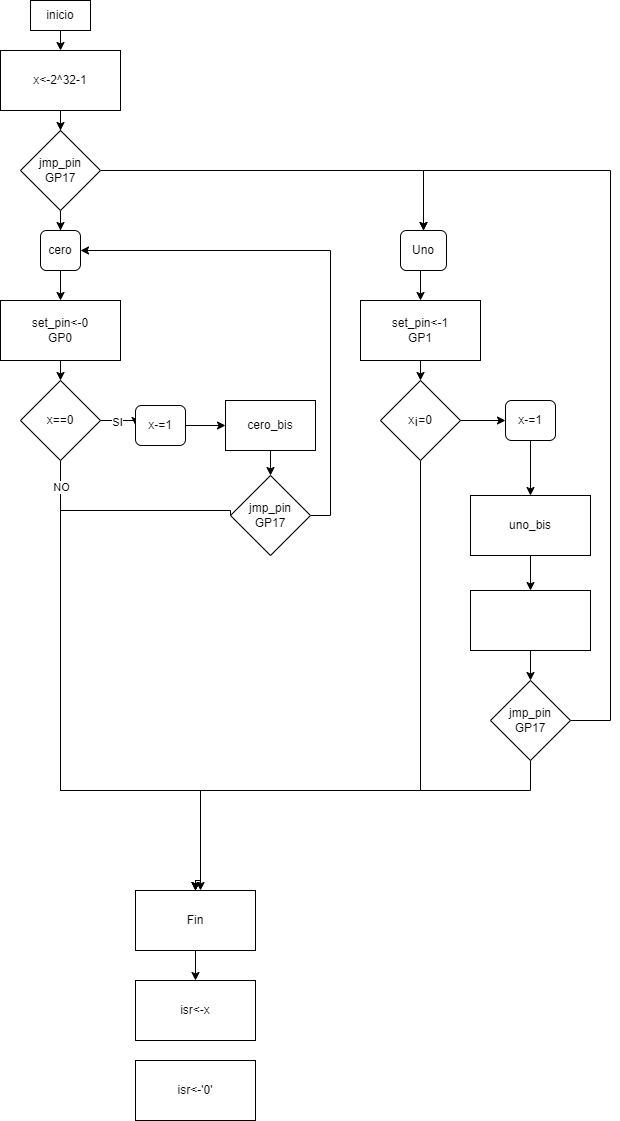

El diagrama presentado anteriormente corresponde al siguiente codigo que se uso en la raspberry



In [ ]:
import time
import rp2
from machine import Pin

@rp2.asm_pio(set_init=rp2.PIO.OUT_LOW)
def blink():
    label('inicio')
    mov(x,invert(null))
    jmp(pin,'uno')
    label('cero')
    set(pins, 0)
    jmp(x_dec,'cero_bis')
    jmp('fin')
    label('cero_bis')
    jmp(pin,'fin')
    jmp('cero')
    label('uno')
    set(pins, 1)
    jmp(x_dec,'uno_bis')
    jmp('fin')
    label('uno_bis')
    nop()
    jmp(pin,'uno')
    label('fin')
    mov(isr,x)
    push(noblock)
    jmp('inicio')


sm = rp2.StateMachine(
    0,
    blink,
    freq=38000*100,
    set_base=Pin(0),
    jmp_pin= Pin(17, Pin.IN, Pin.PULL_UP)
)

sm.active(1)
while True:
    dat=sm.get()
    print(2**32-dat,end=', ')

ModuleNotFoundError: No module named 'rp2'

Se hace la medicion de los datos con el sensor infrarojo presionando la tecla numero 2, la cual fue asignada a nosotros por el docente, de esta forma se obtienen los siguientes datos, cabe aclarar que el procedimiento se realizo 10 veces para obtener el patron de comportamiento correcto

[1815741, 9021, 4262, 622, 483, 623, 483, 626, 483, 594, 512, 621, 485, 622, 484, 626, 482, 624, 484, 621, 1546, 608, 1555, 618, 1541, 591, 1567, 620, 1540, 620, 1544, 623, 1538, 620, 1543, 620, 483, 623, 482, 623, 483, 599, 1566, 617, 1539, 627, 482, 623, 484, 623, 481, 621, 1543, 596, 1566, 618, 1543, 622, 483, 620, 484, 623, 1541, 620, 1544, 622, 1543, 617, 38163, 8866, 2122, 597, 1325552, 9050, 4263, 598, 506, 622, 486, 614, 485, 616, 485, 616, 484, 618, 483, 604, 499, 618, 485, 596, 1567, 621, 1541, 623, 1542, 621, 1544, 620, 1543, 627, 1538, 626, 1539, 626, 1539, 625, 485, 623, 483, 648, 459, 621, 1543, 624, 1540, 626, 483, 622, 483, 625, 482, 622, 1541, 624, 1541, 624, 1540, 624, 484, 600, 507, 625, 1541, 624, 1541, 624, 1541, 624, 38154, 9087, 2095, 618, 997681, 9012, 4285, 599, 506, 625, 484, 620, 486, 619, 485, 624, 483, 624, 483, 624, 482, 623, 484, 607, 1560, 619, 1542, 622, 1543, 619, 1544, 618, 1543, 616, 1546, 594, 1568, 618, 1543, 621, 485, 616, 485, 619, 485, 622, 1541, 618, 1545, 617, 487, 594, 507, 623, 483, 619, 1545, 594, 1567, 619, 1544, 618, 484, 603, 501, 619, 1543, 619, 1545, 617, 1548, 614, 38153, 9009, 2095, 624, 1006746, 9022, 4264, 618, 485, 599, 507, 620, 488, 619, 483, 620, 487, 622, 482, 624, 482, 625, 483, 624, 1540, 596, 1566, 623, 1544, 619, 1544, 595, 1566, 620, 1543, 620, 1543, 598, 1565, 620, 486, 621, 484, 595, 507, 619, 1543, 592, 1569, 610, 486, 610, 487, 612, 486, 617, 1543, 588, 1570, 609, 1546, 589, 511, 610, 486, 612, 1544, 614, 1544, 615, 1545, 615, 38163, 8960, 2100, 610, 1056814, 9004, 4263, 620, 484, 619, 484, 620, 484, 620, 484, 623, 483, 617, 486, 620, 484, 626, 481, 621, 1544, 616, 1543, 595, 1567, 617, 1546, 615, 1544, 618, 1544, 621, 1543, 620, 1544, 616, 485, 615, 485, 614, 485, 617, 1543, 617, 1546, 616, 484, 619, 485, 617, 484, 624, 1541, 594, 1568, 620, 1542, 619, 486, 618, 485, 597, 1566, 618, 1543, 618, 1545, 618, 38162, 8932, 2122, 615, 925451, 9000, 4263, 619, 486, 619, 483, 597, 508, 597, 508, 617, 488, 619, 484, 596, 507, 621, 486, 617, 1544, 616, 1543, 617, 1544, 594, 1567, 620, 1543, 618, 1544, 617, 1542, 620, 1545, 619, 483, 597, 507, 617, 486, 619, 1543, 618, 1544, 619, 482, 595, 508, 621, 484, 621, 1545, 619, 1544, 595, 1567, 618, 484, 618, 486, 619, 1541, 620, 1543, 620, 1541, 618, 38155, 8985, 2097, 617, 1024788, 9002, 4260, 626, 478, 592, 513, 622, 482, 621, 482, 618, 485, 594, 510, 616, 486, 588, 515, 622, 1542, 616, 1547, 614, 1544, 618, 1543, 622, 1540, 621, 1544, 617, 1541, 621, 1542, 618, 486, 597, 508, 622, 483, 622, 1542, 619, 1543, 598, 506, 617, 486, 623, 482, 624, 1545, 592, 1567, 619, 1542, 618, 486, 593, 508, 619, 1545, 593, 1567, 616, 1545, 616, 38160, 8968, 2121, 618, 1000360, 9002, 4263, 621, 486, 595, 505, 615, 485, 619, 484, 621, 482, 596, 507, 620, 484, 620, 484, 619, 1546, 595, 1564, 621, 1542, 614, 1544, 619, 1545, 618, 1542, 592, 1567, 594, 1568, 593, 507, 620, 483, 621, 482, 619, 1543, 615, 1542, 620, 483, 622, 484, 620, 484, 622, 1544, 592, 1565, 619, 1543, 619, 484, 617, 486, 618, 1543, 594, 1566, 619, 1543, 619, 38163, 8956, 2098, 615, 1050247, 8990, 4263, 617, 486, 615, 485, 619, 483, 618, 487, 616, 486, 618, 486, 617, 486, 620, 485, 614, 1544, 619, 1543, 597, 1564, 619, 1543, 618, 1544, 593, 1570, 591, 1566, 615, 1545, 591, 509, 594, 507, 618, 486, 615, 1543, 616, 1543, 613, 486, 613, 486, 593, 510, 616, 1544, 619, 1542, 594, 1566, 616, 484, 616, 485, 618, 1543, 591, 1567, 617, 1544, 592, 38190, 8943, 2099, 592, 1166120, 8960, 4288, 617, 485, 620, 484, 591, 510, 613, 486, 616, 485, 618, 484, 618, 486, 620, 484, 617, 1546, 616, 1544, 618, 1546, 594, 1565, 592, 1570, 614, 1545, 594, 1566, 618, 1543, 618, 484, 644, 461, 616, 486, 619, 1543, 621, 1543, 595, 507, 618, 486, 617, 484, 618, 1543, 617, 1545, 616, 1546, 614, 485, 618, 485, 616, 1544, 617, 1542, 594, 1567, 594, 38186, 8966, 2096, 614]

Con los datos ya obtenidos se separan en diferentes sublistas, tomando en cuenta que una acaba justo cuando tenemos un numero mayor a 1000000, el cual es el criterio en el codigo usado para el análisis de datos

In [ ]:
data_in = [1815741, 9021, 4262, 622, 483, 623, 483, 626, 483, 594, 512, 621, 485, 622, 484, 626, 482, 624, 484, 621, 1546, 608, 1555, 618, 1541, 591, 1567, 620, 1540, 620, 1544, 623, 1538, 620, 1543, 620, 483, 623, 482, 623, 483, 599, 1566, 617, 1539, 627, 482, 623, 484, 623, 481, 621, 1543, 596, 1566, 618, 1543, 622, 483, 620, 484, 623, 1541, 620, 1544, 622, 1543, 617, 38163, 8866, 2122, 597, 1325552, 9050, 4263, 598, 506, 622, 486, 614, 485, 616, 485, 616, 484, 618, 483, 604, 499, 618, 485, 596, 1567, 621, 1541, 623, 1542, 621, 1544, 620, 1543, 627, 1538, 626, 1539, 626, 1539, 625, 485, 623, 483, 648, 459, 621, 1543, 624, 1540, 626, 483, 622, 483, 625, 482, 622, 1541, 624, 1541, 624, 1540, 624, 484, 600, 507, 625, 1541, 624, 1541, 624, 1541, 624, 38154, 9087, 2095, 618, 997681, 9012, 4285, 599, 506, 625, 484, 620, 486, 619, 485, 624, 483, 624, 483, 624, 482, 623, 484, 607, 1560, 619, 1542, 622, 1543, 619, 1544, 618, 1543, 616, 1546, 594, 1568, 618, 1543, 621, 485, 616, 485, 619, 485, 622, 1541, 618, 1545, 617, 487, 594, 507, 623, 483, 619, 1545, 594, 1567, 619, 1544, 618, 484, 603, 501, 619, 1543, 619, 1545, 617, 1548, 614, 38153, 9009, 2095, 624, 1006746, 9022, 4264, 618, 485, 599, 507, 620, 488, 619, 483, 620, 487, 622, 482, 624, 482, 625, 483, 624, 1540, 596, 1566, 623, 1544, 619, 1544, 595, 1566, 620, 1543, 620, 1543, 598, 1565, 620, 486, 621, 484, 595, 507, 619, 1543, 592, 1569, 610, 486, 610, 487, 612, 486, 617, 1543, 588, 1570, 609, 1546, 589, 511, 610, 486, 612, 1544, 614, 1544, 615, 1545, 615, 38163, 8960, 2100, 610, 1056814, 9004, 4263, 620, 484, 619, 484, 620, 484, 620, 484, 623, 483, 617, 486, 620, 484, 626, 481, 621, 1544, 616, 1543, 595, 1567, 617, 1546, 615, 1544, 618, 1544, 621, 1543, 620, 1544, 616, 485, 615, 485, 614, 485, 617, 1543, 617, 1546, 616, 484, 619, 485, 617, 484, 624, 1541, 594, 1568, 620, 1542, 619, 486, 618, 485, 597, 1566, 618, 1543, 618, 1545, 618, 38162, 8932, 2122, 615, 925451, 9000, 4263, 619, 486, 619, 483, 597, 508, 597, 508, 617, 488, 619, 484, 596, 507, 621, 486, 617, 1544, 616, 1543, 617, 1544, 594, 1567, 620, 1543, 618, 1544, 617, 1542, 620, 1545, 619, 483, 597, 507, 617, 486, 619, 1543, 618, 1544, 619, 482, 595, 508, 621, 484, 621, 1545, 619, 1544, 595, 1567, 618, 484, 618, 486, 619, 1541, 620, 1543, 620, 1541, 618, 38155, 8985, 2097, 617, 1024788, 9002, 4260, 626, 478, 592, 513, 622, 482, 621, 482, 618, 485, 594, 510, 616, 486, 588, 515, 622, 1542, 616, 1547, 614, 1544, 618, 1543, 622, 1540, 621, 1544, 617, 1541, 621, 1542, 618, 486, 597, 508, 622, 483, 622, 1542, 619, 1543, 598, 506, 617, 486, 623, 482, 624, 1545, 592, 1567, 619, 1542, 618, 486, 593, 508, 619, 1545, 593, 1567, 616, 1545, 616, 38160, 8968, 2121, 618, 1000360, 9002, 4263, 621, 486, 595, 505, 615, 485, 619, 484, 621, 482, 596, 507, 620, 484, 620, 484, 619, 1546, 595, 1564, 621, 1542, 614, 1544, 619, 1545, 618, 1542, 592, 1567, 594, 1568, 593, 507, 620, 483, 621, 482, 619, 1543, 615, 1542, 620, 483, 622, 484, 620, 484, 622, 1544, 592, 1565, 619, 1543, 619, 484, 617, 486, 618, 1543, 594, 1566, 619, 1543, 619, 38163, 8956, 2098, 615, 1050247, 8990, 4263, 617, 486, 615, 485, 619, 483, 618, 487, 616, 486, 618, 486, 617, 486, 620, 485, 614, 1544, 619, 1543, 597, 1564, 619, 1543, 618, 1544, 593, 1570, 591, 1566, 615, 1545, 591, 509, 594, 507, 618, 486, 615, 1543, 616, 1543, 613, 486, 613, 486, 593, 510, 616, 1544, 619, 1542, 594, 1566, 616, 484, 616, 485, 618, 1543, 591, 1567, 617, 1544, 592, 38190, 8943, 2099, 592, 1166120, 8960, 4288, 617, 485, 620, 484, 591, 510, 613, 486, 616, 485, 618, 484, 618, 486, 620, 484, 617, 1546, 616, 1544, 618, 1546, 594, 1565, 592, 1570, 614, 1545, 594, 1566, 618, 1543, 618, 484, 644, 461, 616, 486, 619, 1543, 621, 1543, 595, 507, 618, 486, 617, 484, 618, 1543, 617, 1545, 616, 1546, 614, 485, 618, 485, 616, 1544, 617, 1542, 594, 1567, 594, 38186, 8966, 2096, 614]
data_out = []
data_temp = []


for data in data_in:
    if data >= 100000:
        if data_temp:
            data_out.append(data_temp)
        data_temp = []
    data_temp.append(data)


if data_temp:
    data_out.append(data_temp)

dataf=[]
for i, dtout in enumerate(data_out):
    dtout.pop(0)
    dataf.append(dtout)

for sublist in dataf:
    print(sublist)

[9021, 4262, 622, 483, 623, 483, 626, 483, 594, 512, 621, 485, 622, 484, 626, 482, 624, 484, 621, 1546, 608, 1555, 618, 1541, 591, 1567, 620, 1540, 620, 1544, 623, 1538, 620, 1543, 620, 483, 623, 482, 623, 483, 599, 1566, 617, 1539, 627, 482, 623, 484, 623, 481, 621, 1543, 596, 1566, 618, 1543, 622, 483, 620, 484, 623, 1541, 620, 1544, 622, 1543, 617, 38163, 8866, 2122, 597]
[9050, 4263, 598, 506, 622, 486, 614, 485, 616, 485, 616, 484, 618, 483, 604, 499, 618, 485, 596, 1567, 621, 1541, 623, 1542, 621, 1544, 620, 1543, 627, 1538, 626, 1539, 626, 1539, 625, 485, 623, 483, 648, 459, 621, 1543, 624, 1540, 626, 483, 622, 483, 625, 482, 622, 1541, 624, 1541, 624, 1540, 624, 484, 600, 507, 625, 1541, 624, 1541, 624, 1541, 624, 38154, 9087, 2095, 618]
[9012, 4285, 599, 506, 625, 484, 620, 486, 619, 485, 624, 483, 624, 483, 624, 482, 623, 484, 607, 1560, 619, 1542, 622, 1543, 619, 1544, 618, 1543, 616, 1546, 594, 1568, 618, 1543, 621, 485, 616, 485, 619, 485, 622, 1541, 618, 1545, 617, 487, 5

Verificamos que los datos tengan la misma cantidad de datos

In [ ]:
for dato in dataf:
    print(len(dato),end=', ')

71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 

Obtenemos los datos impares del análisis, pues son los valores que tiene los bits de información relevantes, esto se pasa a binario y finalmente a hexadecimal

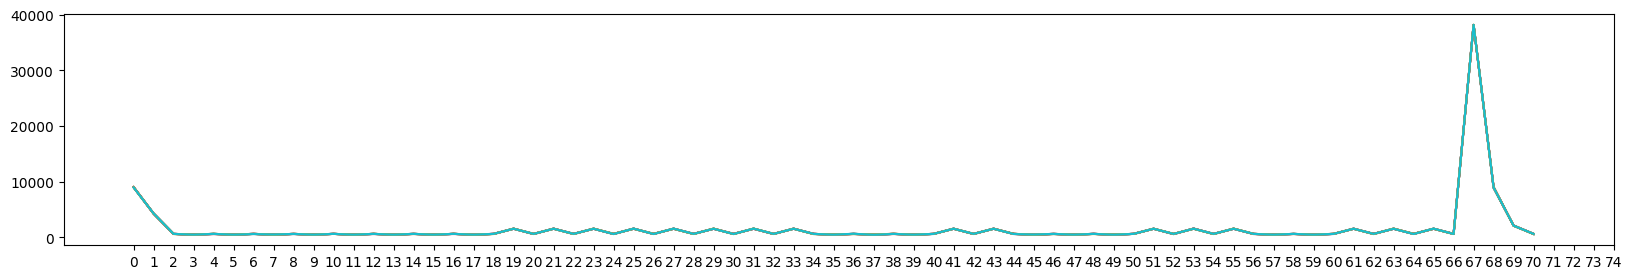

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

x_val=list(range(75))
x=[str(i) for i in range(75)]
fig, ax = plt.subplots()
for dato in dataf:
    ax.plot(dato)
plt.xticks(x_val)
plt.show()

In [ ]:
import numpy as np
A=np.array(dataf)
A.shape

(10, 71)

In [ ]:
promedios=A.mean(axis=0)
promedios.shape

(71,)

In [ ]:
maximos=A.max(axis=0)
maximos.shape

(71,)

In [ ]:
minimos=A.min(axis=0)
minimos.shape

(71,)

In [ ]:
desv_est=A.std(axis=0)
desv_est.shape

(71,)

In [ ]:
for i in range(71):
    print(promedios[i],maximos[i],minimos[i],desv_est[i])

9006.3 9050 8960 22.12713266557599
4267.4 4288 4260 9.624967532412771
615.7 626 598 8.967162315916891
488.5 506 478 9.036038955205981
612.9 625 592 11.878131166138887
491.4 513 483 11.271202242884298
614.4 626 591 10.762899237658967
489.4 510 482 9.941830817309254
613.6 621 594 9.318798205777394
489.6 512 482 10.32666451474047
619.2 624 616 2.85657137141714
484.8 488 482 1.7776388834631178
614.8 624 594 10.137060717979349
488.9 510 482 9.893937537704591
616.5 626 596 8.980534505250787
487.8 507 482 7.959899496852959
618.5 626 588 10.452272480183437
487.1 515 481 9.38562730988185
615.8 624 596 8.034923770640265
1547.9 1567 1540 8.154140052758477
612.2 621 595 8.964373932405987
1548.8 1566 1541 8.942035562443262
614.8 623 595 9.795917517006764
1547.7 1567 1541 9.022749026765624
610.6 621 591 11.672189169131899
1550.7 1567 1543 10.276672613253766
613.9 622 592 10.36773842262622
1547.8 1570 1540 10.254754994635416
616.5 627 593 8.488227141164401
1546.0 1570 1538 8.258329128825032
609.5 626

In [ ]:
impares=[promedios[i] for i in range(2,71) if i%2==1  ]
print(impares, end='')

[488.5, 491.4, 489.4, 489.6, 484.8, 488.9, 487.8, 487.1, 1547.9, 1548.8, 1547.7, 1550.7, 1547.8, 1546.0, 1551.3, 1547.7, 489.3, 488.5, 484.2, 1545.0, 1545.4, 488.6, 489.6, 486.0, 1543.4, 1557.5, 1547.9, 487.1, 491.3, 1545.1, 1550.2, 1546.2, 38164.9, 2104.5]

In [ ]:
pares=[promedios[i] for i in range(2,71) if i%2==0  ]
print(pares, end='')

[615.7, 612.9, 614.4, 613.6, 619.2, 614.8, 616.5, 618.5, 615.8, 612.2, 614.8, 610.6, 613.9, 616.5, 609.5, 615.0, 614.1, 615.0, 619.3, 617.2, 615.7, 614.1, 613.3, 617.4, 620.4, 603.5, 613.3, 615.7, 611.3, 616.6, 611.0, 616.2, 612.7, 8967.2, 612.0]

In [ ]:
len(pares),max(pares),min(pares),sum(pares)/len(pares)

(35, 8967.2, 603.5, 853.14)

In [ ]:
len(impares)

34

In [ ]:
binario=[('1' if impares[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
binario

'00000000111111110001100011100111'

In [ ]:
cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
cod

[0, 255, 24, 231]

In [ ]:
[hex(val) for val in cod]

['0x0', '0xff', '0x18', '0xe7']

# **Reto 1.**

# Codigo binario del 0

In [ ]:
def igualar_sublistas(lista_sublistas):
    # Encontrar la longitud máxima entre todas las sublistas
    max_len = min(len(sublista) for sublista in lista_sublistas)

    # Igualar todas las sublistas a la longitud máxima
    for sublista in lista_sublistas:
        del sublista[max_len:]

    return lista_sublistas

data_in = [3347507, 8963, 4246, 622, 480, 620, 483, 618, 482, 620, 483, 594, 506, 619, 484, 619, 484, 615, 485, 615, 1539, 619, 1537, 616, 1540, 595, 1559, 620, 1538, 621, 1537, 623, 1538, 622, 1537, 627, 480, 619, 1537, 620, 1535, 622, 482, 621, 1539, 622, 483, 595, 506, 600, 502, 619, 1537, 620, 483, 621, 481, 644, 1513, 623, 482, 619, 1541, 619, 1538, 617, 1541, 617, 37998, 9074, 2087, 620, 2636523, 8875, 4273, 612, 488, 591, 508, 617, 484, 617, 484, 619, 483, 595, 507, 618, 486, 616, 485, 622, 1536, 622, 1537, 594, 1562, 619, 1536, 620, 1539, 620, 1538, 620, 1538, 622, 1537, 621, 484, 623, 1538, 617, 1539, 594, 507, 621, 1538, 620, 482, 619, 484, 621, 482, 621, 1538, 619, 484, 618, 486, 617, 1538, 618, 484, 618, 1539, 619, 1537, 617, 1538, 617, 37986, 9001, 2089, 597, 1857503, 8966, 4248, 617, 483, 594, 507, 619, 483, 596, 507, 617, 484, 592, 509, 616, 486, 616, 485, 618, 1539, 618, 1538, 618, 1538, 619, 1538, 623, 1537, 617, 1537, 621, 1538, 618, 1537, 593, 507, 616, 1541, 592, 1562, 594, 507, 618, 1538, 616, 484, 621, 482, 620, 481, 596, 1561, 617, 483, 617, 484, 616, 1541, 592, 508, 617, 1537, 593, 1563, 614, 1540, 616, 37999, 8940, 2115, 612, 1560735, 9021, 4245, 622, 482, 597, 506, 621, 482, 623, 483, 619, 483, 620, 484, 618, 484, 621, 482, 619, 1539, 615, 1538, 621, 1537, 619, 1537, 619, 1538, 593, 1563, 612, 1539, 612, 1540, 612, 486, 610, 1543, 608, 1539, 589, 506, 612, 1539, 611, 484, 612, 484, 610, 486, 587, 1564, 585, 510, 609, 487, 609, 1541, 610, 485, 614, 1539, 611, 1540, 606, 1548, 617, 37998, 8891, 2115, 609, 1497232, 8878, 4249, 587, 507, 587, 509, 612, 485, 586, 509, 587, 507, 611, 485, 588, 510, 612, 484, 613, 1539, 612, 1539, 589, 1565, 609, 1540, 614, 1537, 588, 1564, 613, 1538, 589, 1561, 591, 506, 616, 1538, 591, 1564, 612, 483, 617, 1538, 616, 486, 590, 507, 615, 485, 615, 1540, 589, 508, 614, 485, 614, 1539, 611, 485, 614, 1540, 588, 1562, 612, 1539, 611, 38000, 8939, 2096, 609, 91547, 8908, 2093, 587, 1434488, 8962, 4251, 609, 488, 610, 486, 612, 485, 612, 484, 589, 508, 592, 508, 614, 485, 589, 508, 615, 1538, 591, 1563, 614, 1540, 612, 1541, 612, 1539, 615, 1537, 612, 1538, 613, 1540, 589, 507, 590, 1563, 611, 1540, 590, 507, 614, 1539, 617, 483, 640, 461, 618, 483, 622, 1536, 622, 483, 618, 486, 618, 1537, 621, 481, 620, 1537, 620, 1537, 619, 1537, 597, 38017, 8881, 2115, 612, 1418569, 8890, 4250, 611, 484, 608, 488, 609, 487, 584, 510, 612, 485, 608, 486, 585, 509, 587, 507, 609, 1541, 609, 1540, 589, 1561, 609, 1542, 607, 1540, 609, 1542, 584, 1564, 609, 1540, 586, 510, 609, 1541, 609, 1541, 610, 485, 607, 1544, 587, 510, 586, 508, 612, 485, 613, 1537, 611, 485, 634, 463, 609, 1542, 585, 510, 608, 1542, 610, 1542, 610, 1537, 611, 38001, 8901, 2092, 610, 91552, 8890, 2140, 587, 1266412, 8908, 4249, 586, 510, 609, 486, 608, 489, 610, 486, 607, 486, 587, 508, 585, 510, 585, 509, 586, 1563, 587, 1563, 586, 1563, 588, 1564, 609, 1539, 610, 1541, 608, 1541, 611, 1540, 588, 508, 612, 1537, 590, 1562, 588, 508, 588, 1563, 609, 488, 609, 487, 607, 487, 612, 1539, 587, 508, 612, 487, 609, 1540, 586, 509, 611, 1542, 585, 1565, 610, 1540, 611, 38000, 8904, 2095, 587, 1477061, 8878, 4276, 610, 487, 596, 501, 588, 506, 611, 487, 612, 485, 610, 488, 610, 485, 589, 508, 611, 1540, 612, 1540, 589, 1562, 614, 1540, 588, 1563, 611, 1541, 611, 1541, 587, 1564, 590, 508, 613, 1539, 589, 1563, 612, 485, 592, 1560, 585, 508, 588, 509, 587, 510, 587, 1564, 608, 487, 609, 485, 610, 1543, 607, 486, 612, 1539, 612, 1539, 612, 1540, 610, 38005, 8870, 2092, 610, 1477303, 8900, 4248, 614, 485, 609, 486, 611, 485, 612, 484, 611, 486, 610, 487, 612, 484, 610, 486, 612, 1540, 610, 1540, 588, 1563, 587, 1566, 607, 1540, 611, 1539, 610, 1539, 611, 1539, 611, 487, 607, 1543, 585, 1564, 587, 509, 609, 1539, 611, 485, 611, 484, 610, 485, 609, 1540, 611, 484, 610, 486, 611, 1539, 610, 485, 587, 1564, 610, 1540, 609, 1542, 607, 38004, 8872, 2093, 609, 91557, 8870, 2091, 608]
data_out = []
data_temp = []

for data in data_in:
    if data >= 100000:
        if data_temp:
            data_out.append(data_temp)
        data_temp = []
    data_temp.append(data)

if data_temp:
    data_out.append(data_temp)


for sublist in data_out:
    sublist.pop(0)


dataf = igualar_sublistas(data_out)

# Imprimimos el resultado
for sublist in dataf:
    print(sublist)

[8963, 4246, 622, 480, 620, 483, 618, 482, 620, 483, 594, 506, 619, 484, 619, 484, 615, 485, 615, 1539, 619, 1537, 616, 1540, 595, 1559, 620, 1538, 621, 1537, 623, 1538, 622, 1537, 627, 480, 619, 1537, 620, 1535, 622, 482, 621, 1539, 622, 483, 595, 506, 600, 502, 619, 1537, 620, 483, 621, 481, 644, 1513, 623, 482, 619, 1541, 619, 1538, 617, 1541, 617, 37998, 9074, 2087, 620]
[8875, 4273, 612, 488, 591, 508, 617, 484, 617, 484, 619, 483, 595, 507, 618, 486, 616, 485, 622, 1536, 622, 1537, 594, 1562, 619, 1536, 620, 1539, 620, 1538, 620, 1538, 622, 1537, 621, 484, 623, 1538, 617, 1539, 594, 507, 621, 1538, 620, 482, 619, 484, 621, 482, 621, 1538, 619, 484, 618, 486, 617, 1538, 618, 484, 618, 1539, 619, 1537, 617, 1538, 617, 37986, 9001, 2089, 597]
[8966, 4248, 617, 483, 594, 507, 619, 483, 596, 507, 617, 484, 592, 509, 616, 486, 616, 485, 618, 1539, 618, 1538, 618, 1538, 619, 1538, 623, 1537, 617, 1537, 621, 1538, 618, 1537, 593, 507, 616, 1541, 592, 1562, 594, 507, 618, 1538, 616, 484, 

In [ ]:
for dato in dataf:
    print(len(dato),end=', ')


71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 

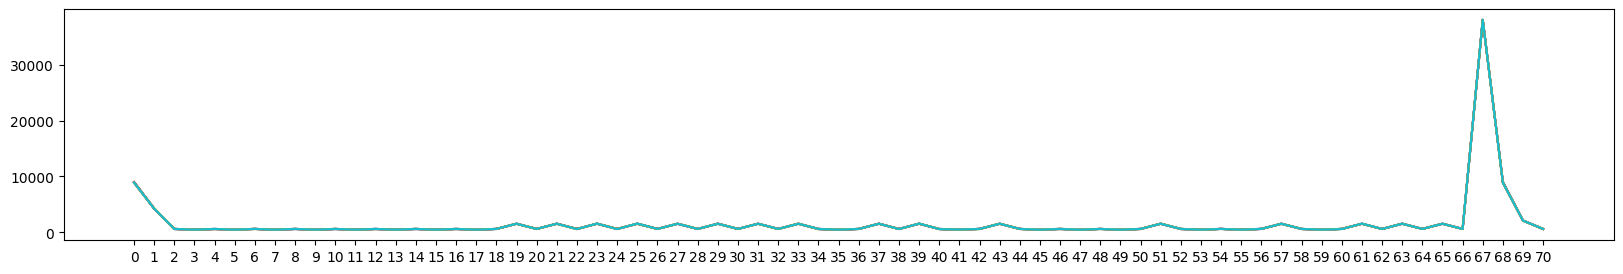

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

x_val=list(range(71))
x=[str(i) for i in range(71)]
fig, ax = plt.subplots()
for dato in dataf:
    ax.plot(dato)
plt.xticks(x_val)
plt.show()

In [ ]:
import numpy as np
A=np.array(dataf)
A.shape

promedios=A.mean(axis=0)
promedios.shape

maximos=A.max(axis=0)
maximos.shape

minimos=A.min(axis=0)
minimos.shape


desv_est=A.std(axis=0)
desv_est.shape


for i in range(71):
    print(promedios[i],maximos[i],minimos[i],desv_est[i])

8924.1 9021 8875 47.70628889360394
4253.5 4276 4245 10.651291001564083
609.0 622 586 12.058192235986288
489.4 510 480 9.8812954616285
602.1 620 587 9.96443676280802
496.0 509 483 10.449880382090505
611.5 621 588 8.891006692158093
486.8 506 482 6.7201190465645775
607.1 623 584 13.003461077728497
491.7 510 483 11.189727431890375
606.7 619 587 11.602154972245456
491.3 508 483 10.334892355511014
604.4 620 587 11.288932633336069
494.6 509 484 11.010903686800644
606.5 619 585 13.69854006819705
492.3 510 484 11.393419153177856
604.0 621 585 13.77679207943562
493.9 509 482 11.562439189029277
612.0 622 586 9.433981132056603
1541.4 1563 1536 7.310266752998827
609.5 622 587 11.002272492535349
1543.5 1563 1537 9.810708435174291
600.4 621 586 13.979985693841034
1553.1 1565 1537 11.785160160133591
607.1 619 587 11.911758896149635
1546.3 1566 1536 11.180787092150533
611.9 623 588 9.679359482941006
1541.0 1563 1537 7.402702209328699
609.5 621 588 10.336827366266691
1543.9 1564 1537 9.954396013822235
6

In [ ]:
impares=[promedios[i] for i in range(2,71) if i%2==1  ]
print(impares, end='')

pares=[promedios[i] for i in range(2,71) if i%2==0  ]
print(pares, end='')

len(pares),max(pares),min(pares),sum(pares)/len(pares)


len(impares)

[489.4, 496.0, 486.8, 491.7, 491.3, 494.6, 492.3, 493.9, 1541.4, 1543.5, 1553.1, 1546.3, 1541.0, 1543.9, 1541.4, 1543.5, 498.3, 1542.0, 1550.9, 497.9, 1543.7, 489.3, 491.2, 488.6, 1545.6, 491.5, 483.0, 1537.3, 491.5, 1542.0, 1546.3, 1540.2, 38000.8, 2098.9][609.0, 602.1, 611.5, 607.1, 606.7, 604.4, 606.5, 604.0, 612.0, 609.5, 600.4, 607.1, 611.9, 609.5, 611.4, 609.4, 600.8, 611.5, 601.2, 599.8, 609.9, 609.4, 607.1, 610.0, 608.1, 606.9, 616.2, 615.7, 606.3, 612.0, 606.7, 612.6, 611.4, 8927.3, 607.5]

34

In [ ]:

binario=[('1' if impares[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
binario


'00000000111111110110100010010111'

In [ ]:


cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
cod

[0, 255, 104, 151]

In [ ]:
[hex(val) for val in cod]

['0x0', '0xff', '0x68', '0x97']

# Codigo binario del 1

In [ ]:
def igualar_sublistas(lista_sublistas):
    # Encontrar la longitud máxima entre todas las sublistas
    max_len = min(len(sublista) for sublista in lista_sublistas)

    # Igualar todas las sublistas a la longitud máxima
    for sublista in lista_sublistas:
        del sublista[max_len:]

    return lista_sublistas

data_in = [2731962, 9066, 4243, 600, 506, 623, 482, 627, 480, 626, 481, 600, 504, 624, 481, 599, 506, 600, 505, 599, 1561, 596, 1561, 618, 1540, 617, 1534, 624, 1537, 623, 1534, 635, 1560, 576, 1559, 606, 503, 603, 506, 625, 1536, 627, 1537, 618, 482, 598, 506, 599, 506, 623, 481, 601, 1559, 624, 1538, 596, 504, 625, 481, 601, 1560, 623, 1537, 596, 1559, 599, 1561, 596, 38011, 9116, 2102, 624, 975261, 9044, 4243, 601, 502, 626, 480, 625, 482, 622, 484, 599, 506, 598, 505, 601, 502, 620, 485, 622, 1536, 597, 1564, 648, 1509, 628, 1536, 623, 1536, 599, 1560, 597, 1559, 622, 1536, 623, 481, 627, 479, 625, 1534, 625, 1535, 598, 506, 624, 481, 598, 506, 622, 480, 624, 1537, 622, 1535, 600, 502, 600, 507, 598, 1562, 597, 1560, 623, 1536, 599, 1559, 622, 37983, 9056, 2084, 600, 759661, 9057, 4219, 622, 482, 622, 483, 597, 505, 622, 482, 623, 481, 621, 482, 621, 483, 598, 505, 597, 1561, 621, 1536, 596, 1560, 622, 1535, 620, 1537, 596, 1562, 597, 1558, 621, 1535, 597, 507, 618, 483, 621, 1537, 622, 1534, 596, 506, 621, 482, 620, 482, 620, 481, 623, 1534, 621, 1564, 590, 483, 596, 507, 621, 1537, 594, 1560, 619, 1539, 620, 1534, 621, 37987, 9032, 2135, 598, 865131, 8997, 4244, 621, 482, 598, 504, 620, 483, 595, 506, 621, 482, 619, 487, 594, 505, 621, 481, 596, 1562, 619, 1538, 595, 1586, 596, 1539, 617, 1540, 595, 1587, 597, 1561, 571, 1559, 604, 500, 598, 506, 623, 1534, 599, 1586, 595, 482, 598, 506, 599, 504, 622, 483, 598, 1586, 596, 1561, 598, 480, 620, 483, 598, 1561, 597, 1587, 573, 1583, 571, 1564, 618, 37989, 9005, 2087, 621, 761194, 8986, 4266, 602, 503, 626, 481, 624, 483, 651, 456, 599, 504, 624, 479, 623, 482, 622, 481, 597, 1562, 620, 1536, 621, 1537, 599, 1559, 620, 1537, 619, 1536, 600, 1558, 623, 1535, 620, 483, 620, 482, 598, 1557, 622, 1537, 620, 483, 618, 484, 620, 482, 619, 483, 596, 1561, 619, 1536, 621, 483, 620, 481, 619, 1538, 622, 1561, 594, 1535, 620, 1537, 621, 37987, 8976, 2088, 592, 987408, 9013, 4268, 623, 482, 620, 512, 572, 503, 599, 506, 621, 484, 597, 506, 597, 505, 622, 482, 596, 1588, 594, 1562, 571, 1587, 595, 1561, 573, 1583, 570, 1587, 573, 1586, 572, 1584, 596, 483, 606, 501, 621, 1565, 570, 1584, 573, 505, 594, 510, 593, 508, 594, 508, 594, 1587, 570, 1587, 571, 506, 597, 506, 597, 1586, 574, 1561, 599, 1587, 597, 1561, 573, 38012, 9028, 2113, 624, 802296, 9003, 4268, 598, 510, 595, 533, 570, 534, 595, 509, 571, 532, 598, 507, 572, 531, 570, 533, 572, 1584, 573, 1584, 574, 1585, 598, 1558, 600, 1556, 572, 1586, 602, 1553, 574, 1583, 573, 533, 570, 534, 596, 1561, 601, 1554, 573, 533, 572, 530, 574, 532, 596, 509, 597, 1557, 577, 1583, 584, 529, 605, 501, 574, 1584, 573, 1582, 579, 1582, 599, 1559, 614, 37942, 9085, 2110, 604, 843177, 9081, 4242, 621, 483, 622, 480, 623, 481, 621, 481, 623, 482, 628, 482, 620, 481, 624, 481, 624, 1538, 619, 1535, 597, 1559, 621, 1535, 597, 1559, 596, 1560, 599, 1559, 619, 1536, 599, 503, 624, 480, 620, 1538, 618, 1537, 596, 505, 619, 483, 620, 484, 620, 480, 620, 1538, 621, 1533, 621, 482, 619, 483, 619, 1536, 597, 1561, 618, 1538, 620, 1536, 620, 37990, 8973, 2115, 619, 835417, 9015, 4267, 616, 490, 623, 485, 627, 481, 627, 481, 626, 481, 603, 506, 626, 482, 603, 505, 605, 1585, 596, 1538, 598, 1564, 623, 1539, 624, 1561, 600, 1563, 573, 1561, 598, 1586, 571, 508, 622, 482, 601, 1560, 621, 1536, 623, 479, 622, 483, 620, 483, 618, 483, 621, 1562, 594, 1539, 595, 503, 620, 484, 596, 1561, 596, 1585, 594, 1537, 620, 1538, 596, 38010, 9049, 2085, 629, 997122, 9064, 4246, 597, 504, 626, 480, 623, 482, 625, 479, 627, 483, 626, 479, 630, 479, 628, 483, 632, 1533, 630, 1535, 626, 1536, 600, 1562, 625, 1534, 602, 1559, 624, 1536, 626, 1534, 627, 480, 605, 503, 605, 1558, 629, 1537, 622, 481, 603, 505, 627, 479, 604, 505, 627, 1535, 604, 1557, 626, 480, 627, 483, 625, 1536, 626, 1536, 626, 1534, 629, 1530, 629, 37985, 9068, 2111, 624]
data_out = []
data_temp = []

for data in data_in:
    if data >= 100000:
        if data_temp:
            data_out.append(data_temp)
        data_temp = []
    data_temp.append(data)

if data_temp:
    data_out.append(data_temp)


for sublist in data_out:
    sublist.pop(0)


dataf = igualar_sublistas(data_out)

# Imprimimos el resultado
for sublist in dataf:
    print(sublist)

[9066, 4243, 600, 506, 623, 482, 627, 480, 626, 481, 600, 504, 624, 481, 599, 506, 600, 505, 599, 1561, 596, 1561, 618, 1540, 617, 1534, 624, 1537, 623, 1534, 635, 1560, 576, 1559, 606, 503, 603, 506, 625, 1536, 627, 1537, 618, 482, 598, 506, 599, 506, 623, 481, 601, 1559, 624, 1538, 596, 504, 625, 481, 601, 1560, 623, 1537, 596, 1559, 599, 1561, 596, 38011, 9116, 2102, 624]
[9044, 4243, 601, 502, 626, 480, 625, 482, 622, 484, 599, 506, 598, 505, 601, 502, 620, 485, 622, 1536, 597, 1564, 648, 1509, 628, 1536, 623, 1536, 599, 1560, 597, 1559, 622, 1536, 623, 481, 627, 479, 625, 1534, 625, 1535, 598, 506, 624, 481, 598, 506, 622, 480, 624, 1537, 622, 1535, 600, 502, 600, 507, 598, 1562, 597, 1560, 623, 1536, 599, 1559, 622, 37983, 9056, 2084, 600]
[9057, 4219, 622, 482, 622, 483, 597, 505, 622, 482, 623, 481, 621, 482, 621, 483, 598, 505, 597, 1561, 621, 1536, 596, 1560, 622, 1535, 620, 1537, 596, 1562, 597, 1558, 621, 1535, 597, 507, 618, 483, 621, 1537, 622, 1534, 596, 506, 621, 482, 6

In [ ]:

for dato in dataf:
    print(len(dato),end=', ')

71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 

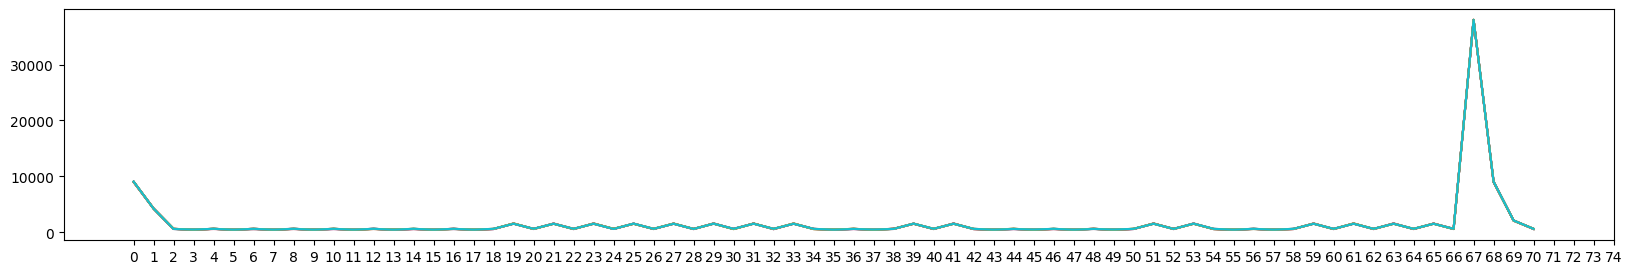

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

x_val=list(range(75))
x=[str(i) for i in range(71)]
fig, ax = plt.subplots()
for dato in dataf:
    ax.plot(dato)
plt.xticks(x_val)
plt.show()

In [ ]:
import numpy as np
A=np.array(dataf)
A.shape


(10, 71)

In [ ]:

promedios=A.mean(axis=0)
promedios.shape

(71,)

In [ ]:
maximos=A.max(axis=0)
maximos.shape

(71,)

In [ ]:
minimos=A.min(axis=0)
minimos.shape


(71,)

In [ ]:

desv_est=A.std(axis=0)
desv_est.shape

(71,)

In [ ]:
for i in range(71):
    print(promedios[i],maximos[i],minimos[i],desv_est[i])


9032.6 9081 8986 31.903604811995777
4250.6 4268 4219 15.37660560722034
610.1 623 597 10.718675291284832
494.4 510 482 11.010903686800644
618.1 626 595 10.985900054160334
492.0 533 480 17.34358671094304
610.8 627 570 21.549013898552296
491.4 534 480 16.728418933061185
618.3 651 595 16.559287424282488
486.5 509 456 15.396428157205813
611.0 627 571 17.25688268488837
493.9 532 481 16.232375057273657
613.8 628 597 12.391932859727733
491.4 507 479 12.109500402576481
608.3 630 572 17.572990639046047
495.6 531 479 16.113348503647526
610.8 628 570 17.075128110793194
494.1 533 481 16.543578814754685
604.0 632 572 16.685322891691367
1561.0 1588 1533 19.426785632214095
606.5 630 573 16.871573726241426
1548.9 1584 1535 16.537533068750005
604.4 648 571 22.63271967749347
1556.3 1587 1509 24.527739398485135
609.9 628 595 12.621014222319852
1545.8 1562 1534 11.737120600896967
612.3 625 573 16.186722954322782
1548.0 1583 1534 15.316657598836633
597.2 623 570 15.992498241363041
1563.4 1587 1534 18.122913

In [ ]:
impares=[promedios[i] for i in range(2,71) if i%2==1  ]
print(impares, end='')

[494.4, 492.0, 491.4, 486.5, 493.9, 491.4, 495.6, 494.1, 1561.0, 1548.9, 1556.3, 1545.8, 1548.0, 1563.4, 1559.1, 1554.7, 498.1, 495.6, 1548.0, 1547.7, 496.2, 497.0, 496.6, 489.3, 1555.6, 1553.3, 495.2, 491.6, 1556.1, 1563.0, 1553.0, 1547.9, 37989.6, 2103.0]

In [ ]:
pares=[promedios[i] for i in range(2,71) if i%2==0  ]
print(pares, end='')

[610.1, 618.1, 610.8, 618.3, 611.0, 613.8, 608.3, 610.8, 604.0, 606.5, 604.4, 609.9, 612.3, 597.2, 599.7, 600.2, 601.6, 609.3, 613.5, 613.4, 601.4, 606.9, 607.0, 613.8, 610.1, 604.8, 600.2, 612.9, 604.8, 599.9, 602.1, 607.4, 611.0, 9038.8, 613.5]

In [ ]:
len(pares),max(pares),min(pares),sum(pares)/len(pares)

(35, 9038.8, 597.2, 848.7942857142857)

In [ ]:
len(impares)

34

In [ ]:
binario=[('1' if impares[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
binario

'00000000111111110011000011001111'

In [ ]:
cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
cod

[0, 255, 48, 207]

In [ ]:
[hex(val) for val in cod]

['0x0', '0xff', '0x30', '0xcf']

# Codigo binario 3

In [ ]:
def igualar_sublistas(lista_sublistas):
    # Encontrar la longitud máxima entre todas las sublistas
    max_len = min(len(sublista) for sublista in lista_sublistas)

    # Igualar todas las sublistas a la longitud máxima
    for sublista in lista_sublistas:
        del sublista[max_len:]

    return lista_sublistas

data_in = [3379294, 8968, 4247, 616, 485, 615, 485, 617, 483, 621, 483, 595, 506, 619, 483, 594, 507, 619, 482, 619, 1536, 618, 1539, 617, 1541, 615, 1538, 595, 1561, 617, 1537, 615, 1540, 590, 1563, 592, 506, 616, 1540, 589, 1563, 615, 1540, 614, 1538, 616, 483, 616, 1540, 613, 485, 617, 1538, 592, 508, 616, 483, 595, 507, 616, 484, 614, 1541, 591, 508, 616, 1538, 616, 37997, 9008, 2089, 620, 905424, 8952, 4249, 614, 484, 616, 483, 593, 508, 616, 484, 616, 485, 593, 507, 617, 484, 617, 484, 592, 1564, 615, 1540, 617, 1537, 619, 1540, 592, 1562, 616, 1539, 616, 1539, 617, 1538, 619, 484, 593, 1562, 615, 1537, 612, 1540, 614, 1539, 611, 485, 612, 1542, 612, 485, 611, 1541, 614, 483, 611, 486, 612, 485, 589, 509, 612, 1539, 614, 484, 612, 1541, 613, 37995, 8903, 2092, 612, 777872, 8918, 4250, 611, 485, 588, 509, 591, 509, 589, 508, 590, 508, 590, 507, 616, 483, 611, 487, 589, 1565, 585, 1565, 611, 1540, 589, 1563, 591, 1563, 588, 1565, 610, 1539, 612, 1541, 611, 485, 614, 1541, 612, 1540, 613, 1540, 612, 1542, 612, 485, 612, 1543, 586, 508, 590, 1562, 612, 486, 612, 484, 614, 482, 588, 510, 611, 1541, 588, 508, 612, 1539, 612, 38000, 8867, 2116, 587, 851515, 8997, 4245, 620, 483, 623, 484, 617, 485, 592, 508, 614, 486, 616, 483, 610, 488, 610, 486, 611, 1540, 587, 1563, 587, 1564, 585, 1565, 585, 1563, 587, 1563, 612, 1539, 590, 1563, 611, 486, 616, 1538, 590, 1562, 614, 1540, 589, 1562, 613, 487, 589, 1564, 611, 487, 610, 1542, 589, 507, 592, 506, 615, 484, 591, 508, 612, 1540, 611, 486, 591, 1563, 587, 38019, 8911, 2092, 609, 868280, 9003, 4246, 617, 484, 619, 484, 616, 485, 618, 483, 620, 484, 618, 484, 594, 508, 615, 486, 591, 1562, 617, 1537, 592, 1563, 590, 1563, 617, 1538, 614, 1540, 617, 1538, 618, 1538, 617, 484, 618, 1537, 609, 1547, 617, 1539, 615, 1538, 620, 483, 595, 1560, 618, 486, 617, 1538, 595, 507, 616, 485, 619, 483, 617, 483, 618, 1537, 617, 485, 617, 1539, 614, 37992, 8955, 2092, 612, 1070611, 9017, 4247, 621, 483, 621, 483, 618, 485, 597, 506, 597, 505, 621, 482, 620, 483, 597, 506, 618, 1538, 617, 1539, 616, 1540, 616, 1538, 618, 1539, 597, 1557, 617, 1537, 618, 1540, 613, 484, 594, 1565, 590, 1563, 617, 1537, 617, 1539, 592, 508, 617, 1538, 617, 482, 617, 1540, 617, 483, 617, 483, 617, 484, 592, 508, 616, 1539, 592, 509, 615, 1541, 613, 37993, 8963, 2091, 593, 1038601, 8990, 4244, 618, 485, 615, 484, 617, 484, 617, 483, 616, 483, 616, 485, 613, 487, 617, 483, 616, 1538, 617, 1537, 617, 1538, 616, 1538, 618, 1539, 615, 1539, 635, 1518, 594, 1562, 615, 484, 617, 1538, 616, 1538, 618, 1539, 614, 1538, 618, 482, 618, 1539, 614, 486, 593, 1561, 615, 484, 617, 484, 615, 487, 590, 508, 618, 1536, 594, 506, 617, 1540, 614, 1114303, 8956, 4269, 616, 486, 617, 485, 593, 507, 618, 484, 615, 485, 616, 485, 618, 483, 621, 482, 617, 1540, 620, 1536, 617, 1540, 616, 1539, 616, 1538, 617, 1538, 616, 1538, 618, 1539, 619, 482, 595, 1561, 616, 1540, 590, 1563, 616, 1537, 616, 484, 593, 1561, 592, 508, 613, 1541, 613, 486, 591, 508, 615, 484, 615, 485, 590, 1562, 615, 484, 591, 1562, 615, 37996, 9009, 2087, 620, 1111679, 8961, 4247, 596, 507, 617, 484, 618, 485, 617, 484, 596, 506, 618, 485, 595, 507, 596, 506, 594, 1566, 613, 1538, 617, 1537, 593, 1561, 592, 1561, 613, 1537, 588, 1563, 613, 1540, 608, 488, 609, 1540, 588, 1562, 588, 1565, 587, 1562, 612, 485, 611, 1541, 588, 508, 590, 1564, 609, 485, 613, 485, 588, 508, 612, 486, 611, 1542, 609, 487, 609, 1541, 590, 38022, 8868, 2114, 612, 1330545, 8948, 4246, 615, 485, 614, 487, 612, 484, 592, 505, 592, 508, 591, 506, 615, 484, 613, 486, 614, 1541, 612, 1542, 589, 1563, 612, 1540, 614, 1539, 614, 1539, 616, 1539, 615, 1537, 593, 506, 618, 1538, 615, 1540, 616, 1537, 617, 1540, 592, 508, 614, 1541, 612, 486, 592, 1561, 617, 483, 616, 484, 615, 486, 591, 507, 615, 1539, 592, 508, 615, 1538, 592, 38018, 8985, 2112, 620]
data_out = []
data_temp = []

for data in data_in:
    if data >= 100000:
        if data_temp:
            data_out.append(data_temp)
        data_temp = []
    data_temp.append(data)

if data_temp:
    data_out.append(data_temp)


for sublist in data_out:
    sublist.pop(0)


dataf = igualar_sublistas(data_out)

# Imprimimos el resultado
for sublist in dataf:
    print(sublist)


[8968, 4247, 616, 485, 615, 485, 617, 483, 621, 483, 595, 506, 619, 483, 594, 507, 619, 482, 619, 1536, 618, 1539, 617, 1541, 615, 1538, 595, 1561, 617, 1537, 615, 1540, 590, 1563, 592, 506, 616, 1540, 589, 1563, 615, 1540, 614, 1538, 616, 483, 616, 1540, 613, 485, 617, 1538, 592, 508, 616, 483, 595, 507, 616, 484, 614, 1541, 591, 508, 616, 1538, 616]
[8952, 4249, 614, 484, 616, 483, 593, 508, 616, 484, 616, 485, 593, 507, 617, 484, 617, 484, 592, 1564, 615, 1540, 617, 1537, 619, 1540, 592, 1562, 616, 1539, 616, 1539, 617, 1538, 619, 484, 593, 1562, 615, 1537, 612, 1540, 614, 1539, 611, 485, 612, 1542, 612, 485, 611, 1541, 614, 483, 611, 486, 612, 485, 589, 509, 612, 1539, 614, 484, 612, 1541, 613]
[8918, 4250, 611, 485, 588, 509, 591, 509, 589, 508, 590, 508, 590, 507, 616, 483, 611, 487, 589, 1565, 585, 1565, 611, 1540, 589, 1563, 591, 1563, 588, 1565, 610, 1539, 612, 1541, 611, 485, 614, 1541, 612, 1540, 613, 1540, 612, 1542, 612, 485, 612, 1543, 586, 508, 590, 1562, 612, 486, 612, 

In [ ]:
for dato in dataf:
    print(len(dato),end=', ')

67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 

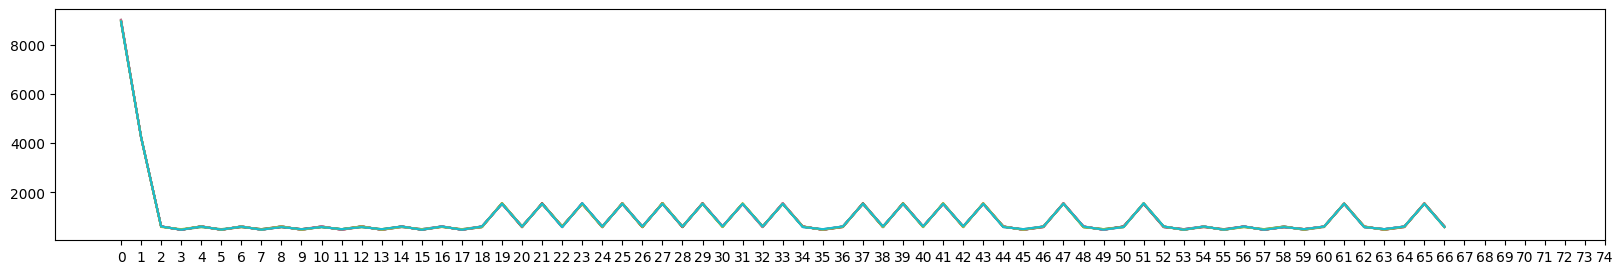

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

x_val=list(range(75))
x=[str(i) for i in range(75)]
fig, ax = plt.subplots()
for dato in dataf:
    ax.plot(dato)
plt.xticks(x_val)
plt.show()

In [ ]:
import numpy as np
A=np.array(dataf)
A.shape

(10, 67)

In [ ]:
promedios=A.mean(axis=0)
promedios.shape
maximos=A.max(axis=0)
maximos.shape
maximos=A.max(axis=0)
maximos.shape
desv_est=A.std(axis=0)
desv_est.shape
for i in range(67):
    print(promedios[i],maximos[i],minimos[i],desv_est[i])

8971.0 9017 8986 28.653097563788805
4249.0 4269 4219 6.870225614927067
614.4 621 597 6.711184694225007
486.7 507 482 6.827151675479314
614.5 623 595 9.233092656309694
486.8 509 480 7.480641683706016
609.2 618 570 11.16960160435456
491.5 509 480 10.828203913853857
607.7 621 595 12.60198397078809
492.8 508 456 11.42628548566856
605.1 620 571 11.344161493913951
495.6 508 481 11.056219968868204
609.8 621 597 12.19672087079146
490.7 507 479 10.49809506529637
609.2 620 572 10.067770358922575
491.4 508 479 10.55651457631732
611.6 621 570 8.212186067059124
488.8 506 481 8.761278445523804
606.1 619 572 12.152777460317456
1549.0 1566 1533 12.553883861180172
610.1 620 573 12.259282197584
1543.6 1565 1535 10.33634364753804
608.0 617 571 12.393546707863734
1546.3 1564 1509 11.225417586887357
605.1 619 595 13.163965967746954
1548.5 1565 1534 11.89327541092024
603.8 618 573 13.052202879207783
1550.3 1563 1534 11.72220115848555
607.8 617 570 11.54816002660164
1545.4 1565 1534 10.846197490365
614.2 635

In [ ]:
impares=[promedios[i] for i in range(2,67) if i%2==1  ]
print(impares, end='')
pares=[promedios[i] for i in range(2,67) if i%2==0  ]
print(pares, end='')
len(pares),max(pares),min(pares),sum(pares)/len(pares)
len(impares)


[486.7, 486.8, 491.5, 492.8, 495.6, 490.7, 491.4, 488.8, 1549.0, 1543.6, 1546.3, 1548.5, 1550.3, 1545.4, 1539.0, 1546.1, 488.9, 1546.0, 1549.2, 1544.0, 1543.5, 489.0, 1546.9, 492.1, 1548.8, 491.2, 488.8, 489.0, 498.8, 1541.6, 496.5, 1544.2][614.4, 614.5, 609.2, 607.7, 605.1, 609.8, 609.2, 611.6, 606.1, 610.1, 608.0, 605.1, 603.8, 607.8, 614.2, 608.5, 609.8, 609.0, 604.0, 610.0, 609.5, 610.2, 607.7, 606.3, 605.0, 607.3, 610.1, 610.5, 600.1, 611.7, 602.3, 609.5, 606.6]

32

In [ ]:
binario=[('1' if impares[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
print(binario)
cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
print(cod)
print([hex(val) for val in cod])

00000000111111110111101010000101
[0, 255, 122, 133]
['0x0', '0xff', '0x7a', '0x85']


# Codigo binario 4.

In [ ]:
def igualar_sublistas(lista_sublistas):
    # Encontrar la longitud máxima entre todas las sublistas
    max_len = min(len(sublista) for sublista in lista_sublistas)

    # Igualar todas las sublistas a la longitud máxima
    for sublista in lista_sublistas:
        del sublista[max_len:]

    return lista_sublistas

data_in = [921270, 9120, 4246, 629, 479, 630, 480, 625, 482, 628, 482, 626, 481, 627, 482, 629, 479, 625, 484, 625, 1535, 604, 1557, 605, 1558, 626, 1535, 604, 1557, 604, 1559, 625, 1535, 601, 1560, 602, 504, 628, 479, 628, 480, 627, 1536, 601, 503, 609, 499, 601, 506, 630, 479, 631, 1532, 629, 1533, 630, 1533, 603, 504, 605, 1560, 626, 1536, 628, 1535, 629, 1532, 629, 37989, 9087, 2111, 627, 1180870, 9153, 4242, 627, 480, 623, 484, 623, 480, 624, 482, 628, 479, 624, 482, 600, 505, 624, 482, 600, 1560, 625, 1537, 623, 1535, 621, 1536, 598, 1561, 619, 1536, 618, 1537, 618, 1537, 618, 483, 617, 483, 618, 483, 616, 1539, 591, 508, 593, 508, 593, 506, 620, 482, 617, 1540, 590, 1563, 591, 1563, 593, 507, 594, 1561, 617, 1537, 618, 1537, 615, 1540, 616, 37995, 8952, 2090, 617, 932171, 9133, 4266, 630, 482, 629, 479, 604, 505, 619, 483, 619, 483, 593, 507, 620, 481, 595, 506, 618, 1538, 619, 1537, 594, 1562, 618, 1539, 593, 1566, 590, 1562, 620, 1537, 599, 1561, 617, 484, 619, 484, 593, 509, 617, 1540, 592, 507, 606, 495, 594, 508, 596, 508, 617, 1537, 620, 1535, 594, 1561, 620, 481, 619, 1538, 617, 1539, 616, 1536, 593, 1565, 613, 37995, 8947, 2114, 618, 828119, 9018, 4243, 624, 481, 622, 482, 620, 484, 596, 507, 620, 484, 622, 481, 596, 505, 598, 505, 622, 1538, 594, 1562, 595, 1561, 596, 1559, 598, 1559, 596, 1561, 621, 1537, 619, 1536, 597, 505, 621, 481, 621, 482, 622, 1536, 618, 485, 618, 483, 620, 482, 620, 482, 621, 1538, 594, 1561, 620, 1537, 594, 506, 621, 1538, 593, 1562, 616, 1539, 601, 1556, 619, 37991, 9052, 2086, 623, 796375, 8981, 4269, 624, 482, 621, 482, 620, 481, 623, 481, 618, 484, 623, 480, 626, 481, 622, 483, 622, 1536, 625, 1535, 623, 1534, 600, 1560, 623, 1536, 599, 1562, 620, 1537, 626, 1537, 628, 482, 634, 479, 636, 476, 638, 1533, 620, 484, 629, 479, 632, 480, 625, 481, 625, 1535, 628, 1534, 607, 1558, 632, 479, 636, 1534, 633, 1533, 632, 1534, 632, 1533, 632, 37982, 9050, 2110, 649, 845338, 9087, 4241, 624, 481, 621, 483, 599, 506, 623, 481, 624, 481, 599, 505, 625, 480, 600, 506, 597, 1562, 620, 1538, 620, 1535, 597, 1560, 620, 1539, 593, 1560, 596, 1560, 646, 1511, 622, 482, 594, 508, 594, 506, 621, 1537, 596, 506, 620, 482, 619, 484, 594, 507, 620, 1537, 618, 1537, 620, 1537, 617, 483, 620, 1535, 621, 1537, 594, 1559, 618, 1565, 568, 38019, 8989, 2087, 619, 756757, 9027, 4248, 620, 482, 597, 506, 621, 481, 624, 481, 622, 481, 624, 481, 598, 507, 595, 507, 623, 1535, 621, 1536, 622, 1538, 620, 1535, 597, 1563, 594, 1562, 594, 1562, 595, 1562, 595, 506, 620, 483, 619, 484, 619, 1537, 597, 505, 621, 482, 595, 507, 597, 505, 621, 1538, 619, 1536, 619, 1539, 617, 483, 620, 1536, 621, 1536, 620, 1539, 617, 1537, 595, 38020, 8956, 2112, 619, 757192, 9034, 4243, 619, 485, 619, 482, 621, 481, 594, 507, 619, 482, 617, 484, 619, 482, 594, 506, 621, 1538, 620, 1539, 617, 1536, 621, 1537, 619, 1538, 598, 1559, 624, 1535, 600, 1561, 622, 481, 602, 503, 604, 503, 629, 1534, 628, 480, 629, 479, 629, 479, 653, 455, 621, 1536, 620, 1536, 626, 1534, 601, 504, 601, 1560, 623, 1535, 624, 1536, 626, 1531, 625, 37984, 9028, 2088, 620, 814260, 9145, 4265, 627, 480, 630, 480, 627, 481, 628, 480, 631, 478, 624, 482, 628, 477, 625, 481, 600, 1560, 624, 1534, 625, 1533, 627, 1536, 625, 1535, 601, 1559, 623, 1536, 602, 1559, 626, 478, 627, 479, 628, 479, 624, 1534, 623, 480, 619, 484, 593, 505, 622, 480, 622, 1536, 597, 1559, 626, 1535, 625, 479, 624, 1541, 619, 1536, 617, 1536, 618, 1537, 620, 37993, 9006, 2085, 623, 822639, 8973, 4243, 597, 503, 603, 504, 600, 504, 624, 481, 628, 481, 622, 484, 624, 483, 646, 458, 597, 1560, 623, 1537, 620, 1535, 621, 1538, 620, 1534, 624, 1536, 620, 1536, 625, 1532, 624, 482, 599, 505, 630, 479, 625, 1535, 594, 507, 599, 503, 612, 491, 593, 507, 595, 1563, 589, 1561, 618, 1536, 596, 504, 623, 1534, 593, 1560, 621, 1534, 618, 1536, 594, 38014, 9000, 2088, 595]
data_out = []
data_temp = []

for data in data_in:
    if data >= 100000:
        if data_temp:
            data_out.append(data_temp)
        data_temp = []
    data_temp.append(data)

if data_temp:
    data_out.append(data_temp)


for sublist in data_out:
    sublist.pop(0)


dataf = igualar_sublistas(data_out)

# Imprimimos el resultado
for sublist in dataf:
    print(sublist)

[9120, 4246, 629, 479, 630, 480, 625, 482, 628, 482, 626, 481, 627, 482, 629, 479, 625, 484, 625, 1535, 604, 1557, 605, 1558, 626, 1535, 604, 1557, 604, 1559, 625, 1535, 601, 1560, 602, 504, 628, 479, 628, 480, 627, 1536, 601, 503, 609, 499, 601, 506, 630, 479, 631, 1532, 629, 1533, 630, 1533, 603, 504, 605, 1560, 626, 1536, 628, 1535, 629, 1532, 629, 37989, 9087, 2111, 627]
[9153, 4242, 627, 480, 623, 484, 623, 480, 624, 482, 628, 479, 624, 482, 600, 505, 624, 482, 600, 1560, 625, 1537, 623, 1535, 621, 1536, 598, 1561, 619, 1536, 618, 1537, 618, 1537, 618, 483, 617, 483, 618, 483, 616, 1539, 591, 508, 593, 508, 593, 506, 620, 482, 617, 1540, 590, 1563, 591, 1563, 593, 507, 594, 1561, 617, 1537, 618, 1537, 615, 1540, 616, 37995, 8952, 2090, 617]
[9133, 4266, 630, 482, 629, 479, 604, 505, 619, 483, 619, 483, 593, 507, 620, 481, 595, 506, 618, 1538, 619, 1537, 594, 1562, 618, 1539, 593, 1566, 590, 1562, 620, 1537, 599, 1561, 617, 484, 619, 484, 593, 509, 617, 1540, 592, 507, 606, 495, 59

In [ ]:
for dato in dataf:
    print(len(dato),end=', ')

71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 

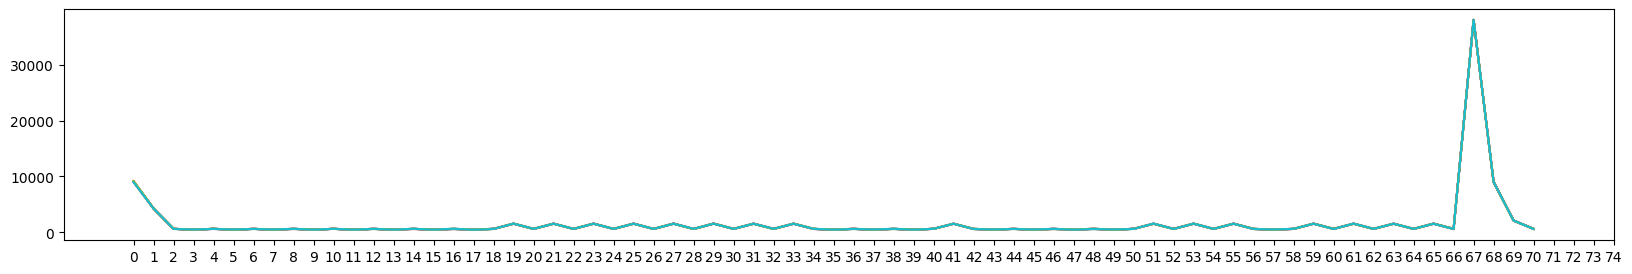

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

x_val=list(range(75))
x=[str(i) for i in range(75)]
fig, ax = plt.subplots()
for dato in dataf:
    ax.plot(dato)
plt.xticks(x_val)
plt.show()

In [ ]:
import numpy as np
A=np.array(dataf)
A.shape

(10, 71)

In [ ]:
promedios=A.mean(axis=0)
promedios.shape
maximos=A.max(axis=0)
maximos.shape
maximos=A.max(axis=0)
maximos.shape
desv_est=A.std(axis=0)
desv_est.shape
for i in range(71):
    print(promedios[i],maximos[i],minimos[i],desv_est[i])

9067.1 9153 8986 65.08986096159678
4250.6 4269 4219 10.725670142233538
622.1 630 597 9.0160967164289
483.5 503 482 6.682065548915245
619.5 630 595 10.547511554864494
486.2 506 480 9.516301802696255
616.0 627 570 10.10940156488009
488.5 506 480 10.855873986004074
618.3 628 595 11.908400396358864
486.5 507 456 10.27861858422619
623.5 631 571 4.341658669218482
481.4 484 481 1.854723699099141
617.5 627 597 11.092790451459903
486.8 507 479 9.682974749528162
616.5 629 572 12.491997438360288
488.0 507 479 11.679041056525147
612.4 646 570 17.258041603843697
491.8 507 481 15.822768405054786
612.5 625 572 11.586630226256467
1546.2 1562 1533 11.737120600896967
617.5 625 573 9.728823155962905
1541.2 1562 1535 9.314504817756012
614.4 625 571 11.262326580240872
1542.7 1562 1509 11.64517067285834
614.7 627 595 11.472140166507728
1543.5 1560 1534 10.651291001564083
609.7 625 573 12.066896867049124
1548.8 1566 1534 12.663332894621382
601.8 624 570 10.618851161966628
1555.6 1562 1534 9.871170143402454
6

In [ ]:
impares=[promedios[i] for i in range(2,71) if i%2==1  ]
print(impares, end='')
pares=[promedios[i] for i in range(2,71) if i%2==0  ]
print(pares, end='')
len(pares),max(pares),min(pares),sum(pares)/len(pares)
len(impares)

[483.5, 486.2, 488.5, 486.5, 481.4, 486.8, 488.0, 491.8, 1546.2, 1541.2, 1542.7, 1543.5, 1548.8, 1555.6, 1541.2, 1545.6, 488.7, 488.4, 488.1, 1536.1, 496.5, 489.4, 494.8, 488.6, 1539.2, 1545.5, 1543.3, 493.0, 1543.7, 1541.1, 1538.5, 1543.2, 37998.2, 2097.1][622.1, 619.5, 616.0, 618.3, 623.5, 617.5, 616.5, 612.4, 612.5, 617.5, 614.4, 614.7, 609.7, 601.8, 616.1, 613.1, 615.1, 616.1, 617.1, 623.8, 606.0, 614.3, 608.8, 615.0, 619.0, 610.4, 615.1, 609.8, 616.3, 616.3, 618.6, 616.7, 611.1, 9006.7, 621.0]

34

In [ ]:
binario=[('1' if impares[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
print(binario)
cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
print(cod)
print([hex(val) for val in cod])

00000000111111110001000011101111
[0, 255, 16, 239]
['0x0', '0xff', '0x10', '0xef']


# Codigo binario 5

In [ ]:
def igualar_sublistas(lista_sublistas):
    # Encontrar la longitud máxima entre todas las sublistas
    max_len = min(len(sublista) for sublista in lista_sublistas)

    # Igualar todas las sublistas a la longitud máxima
    for sublista in lista_sublistas:
        del sublista[max_len:]

    return lista_sublistas

data_in = [1272467, 8961, 4245, 618, 483, 615, 485, 617, 484, 616, 484, 617, 484, 641, 461, 592, 505, 619, 482, 618, 1538, 615, 1541, 589, 1563, 593, 1563, 612, 1543, 611, 1540, 615, 1544, 610, 1540, 590, 508, 617, 482, 614, 1543, 590, 1560, 616, 1537, 593, 508, 593, 506, 615, 484, 616, 1539, 615, 1537, 616, 483, 592, 508, 591, 507, 615, 1540, 591, 1562, 616, 1538, 605, 38005, 9017, 2087, 619, 730908, 8957, 4246, 624, 481, 624, 480, 622, 483, 622, 481, 623, 483, 620, 482, 598, 506, 621, 481, 598, 1563, 617, 1539, 619, 1542, 617, 1537, 623, 1537, 604, 1562, 621, 1535, 600, 1561, 622, 482, 600, 504, 600, 1559, 624, 1536, 619, 1541, 617, 483, 621, 481, 621, 483, 622, 1535, 597, 1561, 645, 456, 622, 481, 622, 481, 621, 1538, 620, 1537, 619, 1539, 618, 37994, 8992, 2089, 619, 731715, 9071, 4244, 631, 480, 626, 482, 601, 505, 601, 506, 607, 503, 624, 481, 620, 483, 599, 506, 623, 1537, 620, 1537, 621, 1536, 623, 1536, 601, 1560, 621, 1540, 619, 1536, 595, 1560, 619, 483, 620, 481, 621, 1537, 593, 1563, 617, 1537, 617, 486, 595, 505, 597, 506, 619, 1540, 591, 1561, 619, 483, 617, 483, 620, 482, 595, 1561, 617, 1541, 615, 1536, 620, 37993, 9016, 2085, 598, 724236, 9152, 4241, 620, 482, 620, 485, 617, 482, 622, 481, 599, 505, 598, 507, 618, 484, 623, 483, 626, 1536, 623, 1534, 623, 1536, 619, 1537, 618, 1541, 614, 1538, 617, 1538, 594, 1562, 592, 505, 599, 501, 619, 1536, 618, 1537, 617, 1540, 612, 484, 617, 485, 616, 483, 619, 1537, 618, 1537, 617, 482, 620, 481, 616, 486, 594, 1563, 616, 1537, 618, 1537, 618, 37994, 8980, 2090, 594, 757249, 9066, 4230, 625, 482, 624, 482, 626, 482, 623, 483, 627, 481, 601, 505, 625, 481, 627, 480, 624, 1537, 600, 1559, 625, 1535, 625, 1536, 623, 1536, 601, 1559, 624, 1536, 599, 1560, 602, 504, 624, 482, 626, 1536, 622, 1535, 623, 1537, 622, 481, 598, 508, 620, 482, 598, 1561, 618, 1539, 595, 505, 620, 482, 596, 508, 595, 1560, 596, 1562, 617, 1537, 596, 38013, 9033, 2113, 620, 708935, 9118, 4244, 621, 486, 595, 508, 595, 509, 592, 537, 567, 510, 593, 509, 593, 535, 593, 484, 593, 1588, 569, 1588, 568, 1588, 569, 1587, 569, 1588, 592, 1565, 570, 1588, 568, 1587, 594, 486, 593, 510, 592, 1587, 570, 1588, 569, 1587, 570, 508, 593, 510, 594, 535, 568, 1587, 570, 1588, 567, 511, 592, 511, 592, 510, 592, 1588, 594, 1562, 594, 1564, 595, 37994, 9018, 2088, 621, 757930, 9124, 4244, 624, 479, 605, 502, 628, 483, 624, 481, 604, 504, 626, 481, 599, 507, 620, 483, 623, 1537, 624, 1535, 600, 1558, 623, 1536, 620, 1538, 620, 1537, 597, 1561, 620, 1536, 619, 485, 596, 505, 623, 1537, 602, 1561, 624, 1535, 630, 482, 627, 480, 629, 479, 653, 1509, 628, 1533, 602, 505, 626, 481, 602, 504, 627, 1536, 624, 1537, 623, 1537, 649, 37966, 9081, 2063, 626, 709365, 9169, 4212, 601, 504, 623, 483, 621, 484, 620, 483, 622, 482, 621, 484, 621, 481, 625, 481, 623, 1538, 621, 1538, 622, 1535, 601, 1559, 601, 1560, 624, 1534, 602, 1560, 602, 1560, 647, 458, 649, 456, 626, 1537, 624, 1536, 626, 1538, 624, 480, 603, 503, 628, 482, 625, 1535, 629, 1533, 628, 481, 630, 481, 629, 480, 629, 1533, 631, 1533, 606, 1523, 666, 37990, 9086, 2110, 626, 782831, 9144, 4240, 605, 506, 626, 481, 624, 483, 624, 481, 600, 505, 599, 506, 623, 482, 621, 485, 619, 1537, 624, 1533, 622, 1539, 618, 1537, 599, 1558, 600, 1561, 621, 1538, 622, 1534, 625, 481, 621, 485, 619, 1538, 620, 1537, 621, 1537, 620, 483, 622, 482, 621, 482, 623, 1537, 620, 1536, 620, 484, 621, 483, 617, 485, 617, 1537, 621, 1537, 621, 1534, 619, 37994, 8979, 2089, 596, 758664, 9128, 4243, 621, 482, 597, 505, 624, 478, 615, 484, 618, 482, 618, 483, 619, 482, 617, 484, 619, 1536, 618, 1537, 595, 1561, 616, 1542, 615, 1539, 616, 1537, 620, 1535, 618, 1539, 616, 484, 623, 480, 624, 1536, 622, 1536, 625, 1535, 600, 505, 624, 483, 625, 483, 626, 1536, 628, 1534, 624, 481, 625, 483, 626, 481, 626, 1535, 624, 1536, 623, 1536, 623, 37987, 8948, 2090, 614]
data_out = []
data_temp = []

for data in data_in:
    if data >= 100000:
        if data_temp:
            data_out.append(data_temp)
        data_temp = []
    data_temp.append(data)

if data_temp:
    data_out.append(data_temp)


for sublist in data_out:
    sublist.pop(0)


dataf = igualar_sublistas(data_out)

# Imprimimos el resultado
for sublist in dataf:
    print(sublist)

[8961, 4245, 618, 483, 615, 485, 617, 484, 616, 484, 617, 484, 641, 461, 592, 505, 619, 482, 618, 1538, 615, 1541, 589, 1563, 593, 1563, 612, 1543, 611, 1540, 615, 1544, 610, 1540, 590, 508, 617, 482, 614, 1543, 590, 1560, 616, 1537, 593, 508, 593, 506, 615, 484, 616, 1539, 615, 1537, 616, 483, 592, 508, 591, 507, 615, 1540, 591, 1562, 616, 1538, 605, 38005, 9017, 2087, 619]
[8957, 4246, 624, 481, 624, 480, 622, 483, 622, 481, 623, 483, 620, 482, 598, 506, 621, 481, 598, 1563, 617, 1539, 619, 1542, 617, 1537, 623, 1537, 604, 1562, 621, 1535, 600, 1561, 622, 482, 600, 504, 600, 1559, 624, 1536, 619, 1541, 617, 483, 621, 481, 621, 483, 622, 1535, 597, 1561, 645, 456, 622, 481, 622, 481, 621, 1538, 620, 1537, 619, 1539, 618, 37994, 8992, 2089, 619]
[9071, 4244, 631, 480, 626, 482, 601, 505, 601, 506, 607, 503, 624, 481, 620, 483, 599, 506, 623, 1537, 620, 1537, 621, 1536, 623, 1536, 601, 1560, 621, 1540, 619, 1536, 595, 1560, 619, 483, 620, 481, 621, 1537, 593, 1563, 617, 1537, 617, 486, 

In [ ]:
for dato in dataf:
    print(len(dato),end=', ')

71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 

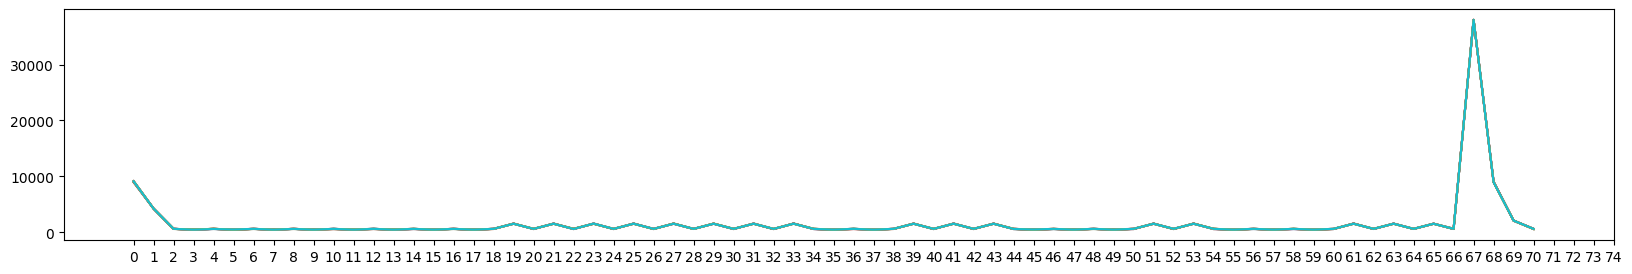

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

x_val=list(range(75))
x=[str(i) for i in range(75)]
fig, ax = plt.subplots()
for dato in dataf:
    ax.plot(dato)
plt.xticks(x_val)
plt.show()

In [ ]:
import numpy as np
A=np.array(dataf)
A.shape

(10, 71)

In [ ]:
promedios=A.mean(axis=0)
promedios.shape
maximos=A.max(axis=0)
maximos.shape
maximos=A.max(axis=0)
maximos.shape
desv_est=A.std(axis=0)
desv_est.shape
for i in range(71):
    print(promedios[i],maximos[i],minimos[i],desv_est[i])

9089.0 9169 8986 71.86236845526315
4238.9 4246 4219 9.954396013822235
619.0 631 597 8.717797887081348
486.5 506 482 9.426027795418387
615.5 626 595 11.46516463030514
489.3 508 480 10.469479452198184
617.5 628 570 10.385085459446158
487.3 509 480 10.02047903046556
615.9 624 595 10.329085148259743
490.1 537 456 17.201453426963663
608.4 627 571 16.746342884343434
493.9 510 481 11.648605066702192
614.1 641 597 14.71359915180511
489.9 509 479 15.109268678529745
610.8 625 572 12.773409881468611
494.6 535 479 17.2
616.5 627 570 10.688779163215974
484.9 506 481 7.189575787207475
616.6 626 572 10.873821775254552
1544.7 1588 1533 16.395426191471817
613.1 624 573 16.139702599490487
1544.1 1588 1535 16.220049321749915
608.4 625 571 18.40760712314341
1549.3 1588 1509 16.793153366774213
610.4 625 595 16.85941873256608
1547.0 1587 1534 16.39512122553536
608.1 623 573 15.680880077342598
1550.0 1588 1534 15.709869509324385
610.3 624 570 10.050373127401787
1547.3 1565 1534 11.983738982471204
610.6 624 5

In [ ]:
impares=[promedios[i] for i in range(2,71) if i%2==1  ]
print(impares, end='')
pares=[promedios[i] for i in range(2,71) if i%2==0  ]
print(pares, end='')
len(pares),max(pares),min(pares),sum(pares)/len(pares)
len(impares)

[486.5, 489.3, 487.3, 490.1, 493.9, 489.9, 494.6, 484.9, 1544.7, 1544.1, 1549.3, 1547.0, 1550.0, 1547.3, 1547.1, 1553.9, 487.6, 488.6, 1544.6, 1548.9, 1542.4, 490.0, 494.3, 489.9, 1541.6, 1545.9, 487.1, 487.4, 492.4, 1549.1, 1544.4, 1538.1, 37993.0, 2090.4][619.0, 615.5, 617.5, 615.9, 608.4, 614.1, 610.8, 616.5, 616.6, 613.1, 608.4, 610.4, 608.1, 610.3, 610.6, 602.8, 612.6, 614.2, 616.4, 608.5, 615.7, 610.5, 609.3, 616.6, 616.9, 611.4, 613.3, 616.5, 611.1, 611.1, 613.4, 615.2, 620.9, 9015.0, 613.3]

34

In [ ]:
binario=[('1' if impares[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
print(binario)
cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
print(cod)
print([hex(val) for val in cod])

00000000111111110011100011000111
[0, 255, 56, 199]
['0x0', '0xff', '0x38', '0xc7']


# Codigo binario 6

In [ ]:
def igualar_sublistas(lista_sublistas):
    # Encontrar la longitud máxima entre todas las sublistas
    max_len = min(len(sublista) for sublista in lista_sublistas)

    # Igualar todas las sublistas a la longitud máxima
    for sublista in lista_sublistas:
        del sublista[max_len:]

    return lista_sublistas

data_in = [869509, 8908, 4272, 591, 505, 619, 483, 619, 482, 618, 482, 619, 483, 617, 484, 618, 484, 594, 508, 617, 1536, 593, 1564, 616, 1539, 595, 1563, 616, 1538, 617, 1537, 620, 1535, 617, 1540, 592, 507, 619, 1537, 594, 507, 618, 1539, 594, 1559, 621, 481, 596, 1560, 621, 481, 619, 1537, 618, 484, 619, 1539, 594, 507, 618, 484, 593, 1562, 617, 483, 595, 1564, 617, 37995, 8958, 2112, 620, 1167088, 9041, 4244, 602, 504, 625, 481, 623, 482, 623, 481, 628, 478, 622, 483, 598, 505, 597, 506, 622, 1535, 595, 1562, 624, 1536, 619, 1539, 620, 1536, 622, 1561, 593, 1538, 618, 1536, 597, 505, 621, 1536, 597, 505, 621, 1538, 593, 1561, 618, 483, 616, 1538, 618, 481, 594, 1560, 619, 480, 617, 1539, 593, 506, 592, 508, 616, 1539, 592, 505, 619, 1536, 616, 37995, 8923, 2114, 617, 707357, 9028, 4243, 597, 507, 599, 506, 621, 482, 622, 480, 624, 478, 622, 485, 617, 481, 595, 507, 597, 1560, 624, 1534, 620, 1536, 619, 1538, 597, 1559, 621, 1538, 597, 1559, 621, 1536, 596, 505, 620, 1538, 615, 485, 596, 1561, 593, 1564, 614, 484, 594, 1564, 618, 482, 620, 1538, 596, 505, 619, 1537, 621, 482, 621, 482, 619, 1538, 594, 508, 594, 1563, 617, 37989, 9004, 2088, 620, 635315, 8992, 4245, 596, 505, 619, 482, 621, 483, 595, 506, 621, 481, 599, 502, 621, 482, 597, 505, 595, 1561, 618, 1536, 620, 1535, 619, 1537, 620, 1535, 594, 1560, 621, 1535, 619, 1534, 596, 504, 617, 1539, 595, 505, 594, 1561, 618, 1537, 595, 506, 617, 1536, 621, 482, 620, 1536, 620, 482, 619, 1537, 595, 506, 619, 482, 622, 1534, 595, 505, 620, 1537, 613, 38001, 9036, 2092, 593, 798100, 8926, 4249, 593, 507, 590, 509, 616, 483, 591, 509, 591, 508, 590, 508, 592, 507, 593, 508, 591, 1586, 590, 1541, 588, 1564, 589, 1587, 565, 1586, 591, 1539, 588, 1587, 566, 1565, 588, 506, 614, 1542, 589, 507, 593, 1586, 568, 1586, 592, 482, 594, 1587, 567, 508, 592, 1587, 568, 506, 593, 1566, 590, 506, 618, 486, 591, 1564, 594, 506, 595, 1561, 594, 38017, 8957, 2113, 620, 717456, 9015, 4246, 621, 480, 624, 479, 620, 482, 618, 482, 595, 507, 619, 482, 621, 480, 617, 484, 615, 1539, 638, 1512, 617, 1538, 590, 1561, 617, 1537, 619, 1538, 593, 1562, 620, 1537, 621, 480, 623, 1535, 621, 481, 619, 1537, 602, 1557, 598, 507, 595, 1560, 619, 482, 597, 1560, 615, 483, 596, 1560, 615, 485, 615, 484, 616, 1537, 620, 481, 614, 1540, 616, 37996, 8933, 2113, 595, 693498, 8994, 4247, 599, 503, 618, 484, 622, 482, 598, 506, 620, 482, 600, 506, 623, 480, 621, 484, 594, 1560, 622, 1535, 594, 1560, 594, 1560, 592, 1564, 613, 1540, 613, 1539, 616, 1536, 592, 508, 592, 1560, 616, 482, 615, 1538, 592, 1561, 592, 506, 615, 1537, 615, 484, 593, 1560, 591, 507, 616, 1539, 614, 482, 591, 508, 615, 1538, 592, 506, 616, 1537, 591, 38021, 8913, 2093, 589, 702125, 8870, 4271, 589, 508, 588, 509, 589, 507, 590, 507, 613, 484, 589, 508, 592, 504, 616, 482, 591, 1562, 598, 1554, 614, 1539, 617, 1537, 613, 1541, 615, 1540, 590, 1563, 613, 1537, 614, 485, 618, 1539, 614, 483, 594, 1561, 613, 1538, 615, 481, 591, 1564, 613, 485, 613, 1538, 596, 501, 617, 1539, 590, 506, 612, 483, 589, 1563, 590, 508, 615, 1537, 612, 37999, 8872, 2114, 588, 1189848, 8888, 4247, 589, 506, 614, 485, 586, 508, 587, 508, 612, 485, 610, 486, 588, 507, 611, 485, 587, 1564, 587, 1563, 611, 1541, 610, 1539, 587, 1565, 584, 1564, 612, 1537, 588, 1562, 613, 484, 611, 1539, 588, 507, 612, 1539, 611, 1541, 586, 508, 587, 1564, 612, 482, 614, 1538, 586, 508, 614, 1536, 613, 484, 612, 485, 587, 1564, 609, 485, 588, 1564, 586, 38027, 8873, 2112, 614, 759367, 8892, 4248, 588, 507, 614, 482, 588, 507, 590, 507, 614, 483, 589, 504, 590, 508, 589, 507, 613, 1539, 608, 1541, 614, 1539, 611, 1538, 615, 1537, 590, 1561, 588, 1564, 588, 1562, 591, 506, 616, 1535, 618, 482, 590, 1561, 591, 1561, 612, 483, 590, 1562, 590, 507, 589, 1562, 615, 481, 591, 1561, 612, 483, 593, 506, 614, 1536, 615, 484, 611, 1541, 589, 38020, 8909, 2088, 617]
data_out = []
data_temp = []

for data in data_in:
    if data >= 100000:
        if data_temp:
            data_out.append(data_temp)
        data_temp = []
    data_temp.append(data)

if data_temp:
    data_out.append(data_temp)


for sublist in data_out:
    sublist.pop(0)


dataf = igualar_sublistas(data_out)

# Imprimimos el resultado
for sublist in dataf:
    print(sublist)

[8908, 4272, 591, 505, 619, 483, 619, 482, 618, 482, 619, 483, 617, 484, 618, 484, 594, 508, 617, 1536, 593, 1564, 616, 1539, 595, 1563, 616, 1538, 617, 1537, 620, 1535, 617, 1540, 592, 507, 619, 1537, 594, 507, 618, 1539, 594, 1559, 621, 481, 596, 1560, 621, 481, 619, 1537, 618, 484, 619, 1539, 594, 507, 618, 484, 593, 1562, 617, 483, 595, 1564, 617, 37995, 8958, 2112, 620]
[9041, 4244, 602, 504, 625, 481, 623, 482, 623, 481, 628, 478, 622, 483, 598, 505, 597, 506, 622, 1535, 595, 1562, 624, 1536, 619, 1539, 620, 1536, 622, 1561, 593, 1538, 618, 1536, 597, 505, 621, 1536, 597, 505, 621, 1538, 593, 1561, 618, 483, 616, 1538, 618, 481, 594, 1560, 619, 480, 617, 1539, 593, 506, 592, 508, 616, 1539, 592, 505, 619, 1536, 616, 37995, 8923, 2114, 617]
[9028, 4243, 597, 507, 599, 506, 621, 482, 622, 480, 624, 478, 622, 485, 617, 481, 595, 507, 597, 1560, 624, 1534, 620, 1536, 619, 1538, 597, 1559, 621, 1538, 597, 1559, 621, 1536, 596, 505, 620, 1538, 615, 485, 596, 1561, 593, 1564, 614, 484, 

In [ ]:
for dato in dataf:
    print(len(dato),end=', ')

71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 

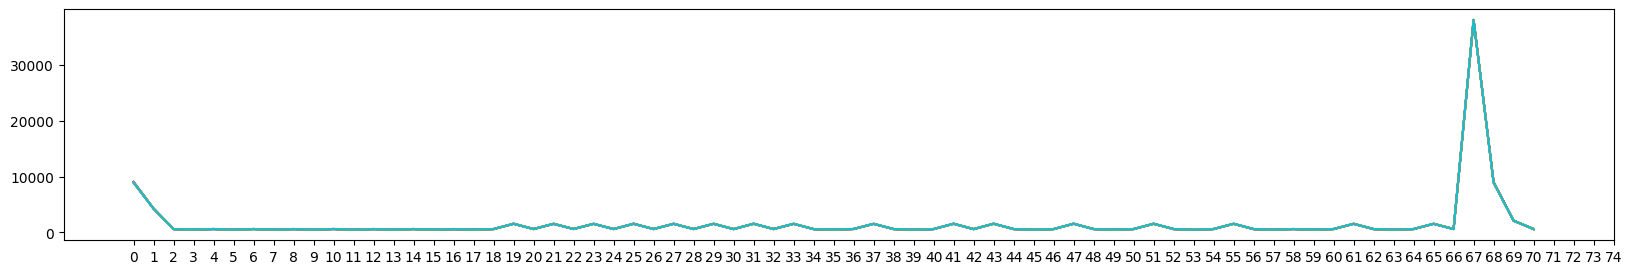

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

x_val=list(range(75))
x=[str(i) for i in range(75)]
fig, ax = plt.subplots()
for dato in dataf:
    ax.plot(dato)
plt.xticks(x_val)
plt.show()

In [ ]:
import numpy as np
A=np.array(dataf)
A.shape

(10, 71)

In [ ]:
promedios=A.mean(axis=0)
promedios.shape
maximos=A.max(axis=0)
maximos.shape
maximos=A.max(axis=0)
maximos.shape
desv_est=A.std(axis=0)
desv_est.shape
for i in range(71):
    print(promedios[i],maximos[i],minimos[i],desv_est[i])

8955.4 9041 8986 61.600649347226856
4251.2 4272 4219 10.293687385966217
596.5 621 597 9.297849213662266
503.2 508 482 7.871467461661769
611.0 625 595 12.938315191708694
490.0 509 480 11.907980517283358
610.5 623 570 15.068178390236824
489.8 508 480 11.487384384619503
603.2 623 595 14.274452704044382
496.8 509 456 12.734205903785286
613.7 628 571 11.402192771568107
486.9 508 481 10.530432089900204
605.7 622 597 13.176114753598648
494.8 508 479 10.970870521521983
606.0 623 572 14.2828568570857
493.8 508 479 12.48839461259933
603.0 621 570 11.251666543228163
497.6 508 481 11.359577456930342
602.2 622 572 12.32720568498798
1554.2 1586 1533 15.632018423735305
607.3 638 573 16.450227961946304
1544.2 1564 1535 15.721323099535866
611.8 624 571 11.052601503718478
1542.7 1564 1509 9.839207285142436
606.3 619 595 12.157713600837946
1549.9 1587 1534 16.2077142126828
604.2 620 573 17.405746177627663
1549.8 1586 1534 16.678129391511508
606.6 622 570 14.164744967700619
1547.8 1564 1534 11.25877435603

In [ ]:
impares=[promedios[i] for i in range(2,71) if i%2==1  ]
print(impares, end='')
pares=[promedios[i] for i in range(2,71) if i%2==0  ]
print(pares, end='')
len(pares),max(pares),min(pares),sum(pares)/len(pares)
len(impares)

[503.2, 490.0, 489.8, 496.8, 486.9, 494.8, 493.8, 497.6, 1554.2, 1544.2, 1542.7, 1549.9, 1549.8, 1547.8, 1551.9, 1544.5, 499.0, 1540.0, 494.4, 1552.1, 1556.5, 492.1, 1557.2, 487.4, 1551.6, 493.7, 1545.3, 494.7, 490.8, 1547.5, 497.1, 1548.0, 38006.0, 2103.9][596.5, 611.0, 610.5, 603.2, 613.7, 605.7, 606.0, 603.0, 602.2, 607.3, 611.8, 606.3, 604.2, 606.6, 601.5, 606.6, 600.0, 615.1, 604.7, 605.2, 597.5, 604.3, 599.5, 609.4, 605.1, 602.4, 610.1, 603.7, 609.1, 606.2, 601.8, 606.7, 605.1, 8937.8, 607.3]

34

In [ ]:
binario=[('1' if impares[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
print(binario)
cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
print(cod)
print([hex(val) for val in cod])

00000000111111110101101010100101
[0, 255, 90, 165]
['0x0', '0xff', '0x5a', '0xa5']


# Codigo Binario 7

In [ ]:
def igualar_sublistas(lista_sublistas):
    # Encontrar la longitud máxima entre todas las sublistas
    max_len = min(len(sublista) for sublista in lista_sublistas)

    # Igualar todas las sublistas a la longitud máxima
    for sublista in lista_sublistas:
        del sublista[max_len:]

    return lista_sublistas

data_in = [2006316, 8906, 4246, 616, 482, 590, 509, 612, 485, 615, 483, 592, 508, 614, 483, 593, 506, 594, 507, 591, 1561, 615, 1539, 613, 1537, 590, 1564, 586, 1562, 610, 1540, 606, 1541, 607, 1540, 586, 507, 585, 1564, 584, 508, 608, 486, 607, 486, 585, 508, 586, 1563, 606, 487, 608, 1540, 608, 484, 591, 1558, 606, 1541, 607, 1540, 607, 1540, 609, 484, 584, 1566, 606, 38001, 8823, 2115, 585, 715699, 8850, 4249, 612, 485, 609, 483, 612, 483, 611, 482, 612, 483, 587, 508, 585, 509, 610, 484, 585, 1562, 611, 1538, 610, 1539, 586, 1562, 611, 1540, 610, 1538, 610, 1538, 612, 1539, 585, 508, 612, 1540, 608, 488, 608, 485, 614, 482, 611, 485, 635, 1515, 612, 482, 612, 1540, 587, 507, 614, 1540, 611, 1563, 586, 1541, 613, 1560, 563, 507, 612, 1539, 586, 38024, 8889, 2112, 590, 805999, 8854, 4274, 609, 485, 589, 507, 614, 483, 590, 507, 612, 485, 588, 508, 591, 505, 590, 508, 612, 1539, 615, 1536, 589, 1561, 590, 1563, 614, 1537, 590, 1561, 616, 1536, 592, 1561, 590, 507, 615, 1538, 591, 507, 593, 506, 615, 485, 614, 483, 593, 1560, 615, 484, 594, 1559, 617, 482, 616, 1539, 615, 1535, 617, 1536, 590, 1562, 617, 481, 613, 1540, 591, 38017, 8907, 2115, 588, 895921, 8882, 4269, 591, 507, 589, 507, 614, 484, 590, 508, 613, 483, 590, 508, 590, 506, 616, 482, 613, 1541, 586, 1562, 590, 1562, 589, 1560, 614, 1540, 612, 1539, 589, 1561, 591, 1561, 589, 508, 590, 1563, 614, 481, 616, 481, 617, 483, 589, 507, 589, 1562, 592, 505, 591, 1561, 615, 483, 617, 1536, 612, 1538, 614, 1538, 614, 1536, 615, 483, 615, 1538, 613, 37994, 8892, 2113, 613, 815296, 8955, 4244, 620, 483, 593, 507, 618, 484, 620, 482, 592, 507, 595, 506, 617, 483, 595, 507, 593, 1564, 613, 1539, 614, 1538, 591, 1561, 591, 1561, 616, 1536, 616, 1537, 614, 1539, 591, 508, 615, 1539, 614, 482, 592, 509, 613, 483, 611, 487, 590, 1561, 613, 484, 589, 1563, 614, 482, 613, 1540, 606, 1543, 588, 1562, 588, 1562, 589, 507, 611, 1541, 610, 38000, 8862, 2139, 586, 734592, 8906, 4246, 591, 507, 614, 484, 610, 487, 588, 509, 609, 486, 590, 507, 592, 505, 591, 507, 612, 1539, 591, 1560, 616, 1539, 608, 1540, 612, 1540, 611, 1539, 613, 1537, 613, 1542, 608, 485, 611, 1537, 612, 483, 610, 484, 588, 507, 586, 509, 586, 1563, 608, 485, 610, 1540, 608, 488, 582, 1564, 607, 1542, 586, 1562, 609, 1541, 606, 485, 609, 1541, 609, 38000, 8855, 2092, 609, 743338, 8875, 4250, 610, 485, 611, 485, 586, 510, 611, 483, 612, 483, 587, 509, 609, 485, 610, 485, 612, 1537, 587, 1563, 586, 1563, 603, 1547, 608, 1565, 584, 1539, 611, 1539, 609, 1538, 609, 485, 608, 1543, 609, 483, 610, 486, 584, 509, 610, 484, 586, 1564, 610, 486, 584, 1565, 608, 482, 612, 1539, 610, 1540, 610, 1537, 609, 1541, 610, 483, 612, 1539, 609, 38003, 8842, 2114, 587, 735700, 8868, 4249, 610, 486, 610, 484, 611, 484, 610, 484, 586, 508, 611, 485, 586, 509, 610, 485, 610, 1539, 587, 1564, 610, 1542, 606, 1541, 610, 1539, 609, 1543, 608, 1540, 611, 1538, 587, 507, 587, 1565, 611, 482, 587, 508, 587, 511, 585, 509, 586, 1565, 608, 484, 613, 1539, 585, 509, 609, 1539, 588, 1564, 610, 1541, 583, 1560, 611, 484, 588, 1563, 611, 37997, 8863, 2092, 608, 760522, 8915, 4248, 615, 484, 613, 484, 590, 507, 614, 484, 615, 483, 590, 509, 613, 484, 614, 484, 616, 1536, 589, 1563, 615, 1537, 615, 1536, 614, 1539, 591, 1561, 590, 1565, 608, 1539, 614, 483, 613, 1539, 589, 508, 588, 508, 614, 483, 613, 483, 590, 1562, 590, 507, 589, 1562, 614, 484, 589, 1564, 611, 1539, 588, 1563, 612, 1540, 589, 507, 611, 1539, 588, 38024, 8860, 2114, 588, 91562, 8871, 2090, 588, 687763, 8968, 4269, 622, 482, 620, 480, 600, 506, 597, 505, 620, 484, 620, 483, 598, 503, 601, 504, 621, 1535, 622, 1535, 622, 1537, 622, 1534, 624, 1534, 601, 1557, 623, 1539, 596, 1561, 622, 482, 602, 1557, 601, 503, 626, 479, 623, 481, 624, 483, 619, 1539, 622, 480, 621, 1535, 625, 479, 623, 1536, 595, 1559, 621, 1536, 620, 1536, 622, 482, 597, 1561, 595, 38014, 8886, 2091, 589]
data_out = []
data_temp = []

for data in data_in:
    if data >= 100000:
        if data_temp:
            data_out.append(data_temp)
        data_temp = []
    data_temp.append(data)

if data_temp:
    data_out.append(data_temp)


for sublist in data_out:
    sublist.pop(0)


dataf = igualar_sublistas(data_out)

# Imprimimos el resultado
for sublist in dataf:
    print(sublist)

[8906, 4246, 616, 482, 590, 509, 612, 485, 615, 483, 592, 508, 614, 483, 593, 506, 594, 507, 591, 1561, 615, 1539, 613, 1537, 590, 1564, 586, 1562, 610, 1540, 606, 1541, 607, 1540, 586, 507, 585, 1564, 584, 508, 608, 486, 607, 486, 585, 508, 586, 1563, 606, 487, 608, 1540, 608, 484, 591, 1558, 606, 1541, 607, 1540, 607, 1540, 609, 484, 584, 1566, 606, 38001, 8823, 2115, 585]
[8850, 4249, 612, 485, 609, 483, 612, 483, 611, 482, 612, 483, 587, 508, 585, 509, 610, 484, 585, 1562, 611, 1538, 610, 1539, 586, 1562, 611, 1540, 610, 1538, 610, 1538, 612, 1539, 585, 508, 612, 1540, 608, 488, 608, 485, 614, 482, 611, 485, 635, 1515, 612, 482, 612, 1540, 587, 507, 614, 1540, 611, 1563, 586, 1541, 613, 1560, 563, 507, 612, 1539, 586, 38024, 8889, 2112, 590]
[8854, 4274, 609, 485, 589, 507, 614, 483, 590, 507, 612, 485, 588, 508, 591, 505, 590, 508, 612, 1539, 615, 1536, 589, 1561, 590, 1563, 614, 1537, 590, 1561, 616, 1536, 592, 1561, 590, 507, 615, 1538, 591, 507, 593, 506, 615, 485, 614, 483, 59

In [ ]:
for dato in dataf:
    print(len(dato),end=', ')

71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 

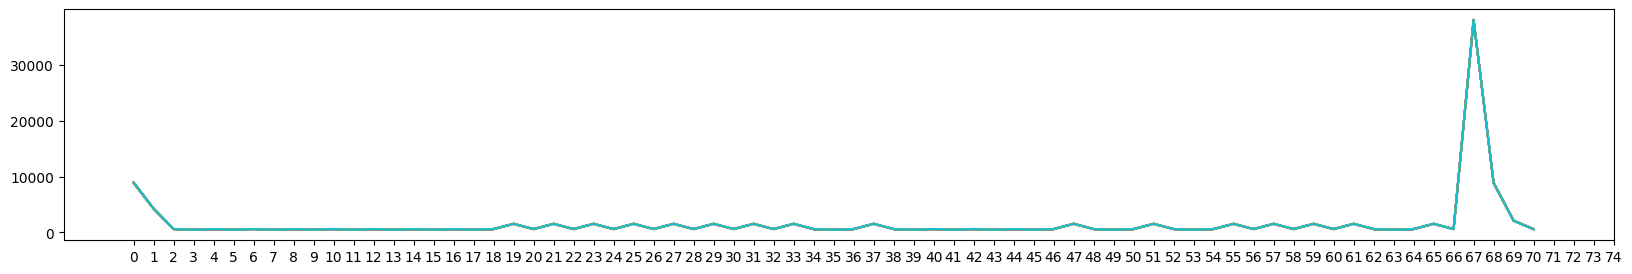

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

x_val=list(range(75))
x=[str(i) for i in range(75)]
fig, ax = plt.subplots()
for dato in dataf:
    ax.plot(dato)
plt.xticks(x_val)
plt.show()

In [ ]:
import numpy as np
A=np.array(dataf)
A.shape

(10, 71)

In [ ]:
promedios=A.mean(axis=0)
promedios.shape
maximos=A.max(axis=0)
maximos.shape
maximos=A.max(axis=0)
maximos.shape
desv_est=A.std(axis=0)
desv_est.shape
for i in range(71):
    print(promedios[i],maximos[i],minimos[i],desv_est[i])

8897.9 8968 8986 38.06691476860188
4254.4 4274 4219 10.85541339608953
609.6 622 597 10.150862032359615
488.6 507 482 9.286549412995118
603.8 620 595 11.461239025515521
493.0 509 480 11.916375287812984
606.7 618 570 10.354226190305097
491.3 510 480 10.807867504739315
604.6 620 595 11.42103322821539
492.7 509 456 11.933566105737212
606.3 620 571 11.10900535601635
491.0 508 481 10.954451150103322
597.2 620 597 12.023310692151309
500.6 509 479 11.128342194594843
597.4 617 572 10.910545357588685
499.5 509 479 10.29805806936434
603.1 616 570 9.481033698917011
495.3 508 481 11.367057666784312
606.5 621 572 11.534730165894649
1545.3 1564 1533 11.287603820120546
601.6 622 573 13.908270920570969
1549.9 1564 1535 12.589281155014373
606.5 622 571 12.34706442843804
1545.5 1563 1509 10.901834707974617
600.0 622 595 11.899579824514813
1550.8 1564 1534 11.685888926393233
608.4 624 573 10.790736768172968
1545.7 1565 1534 11.278741064498288
603.4 616 570 10.60377291344925
1545.3 1561 1534 9.602603813549

In [ ]:
impares=[promedios[i] for i in range(2,71) if i%2==1  ]
print(impares, end='')
pares=[promedios[i] for i in range(2,71) if i%2==0  ]
print(pares, end='')
len(pares),max(pares),min(pares),sum(pares)/len(pares)
len(impares)

[488.6, 493.0, 491.3, 492.7, 491.0, 500.6, 499.5, 495.3, 1545.3, 1549.9, 1545.5, 1550.8, 1545.7, 1545.3, 1543.3, 1545.8, 498.0, 1548.5, 492.5, 493.2, 491.0, 493.8, 1555.4, 488.4, 1550.4, 488.0, 1545.5, 1546.4, 1545.6, 1547.8, 490.3, 1546.7, 38007.4, 2109.7][609.6, 603.8, 606.7, 604.6, 606.3, 597.2, 597.4, 603.1, 606.5, 601.6, 606.5, 600.0, 608.4, 603.4, 608.2, 605.3, 598.1, 603.8, 603.3, 603.8, 606.2, 602.8, 596.0, 607.6, 601.1, 608.1, 606.6, 606.1, 602.7, 604.5, 603.1, 605.2, 601.8, 8867.9, 594.3]

34

In [ ]:
binario=[('1' if impares[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
print(binario)
cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
print(cod)
print([hex(val) for val in cod])

00000000111111110100001010111101
[0, 255, 66, 189]
['0x0', '0xff', '0x42', '0xbd']


# Codigo binario 8

In [ ]:
def igualar_sublistas(lista_sublistas):
    # Encontrar la longitud máxima entre todas las sublistas
    max_len = min(len(sublista) for sublista in lista_sublistas)

    # Igualar todas las sublistas a la longitud máxima
    for sublista in lista_sublistas:
        del sublista[max_len:]

    return lista_sublistas

data_in = [3154935, 8864, 4248, 612, 484, 611, 484, 587, 507, 586, 509, 588, 506, 612, 482, 588, 508, 610, 487, 606, 1540, 587, 1562, 586, 1565, 584, 1563, 598, 1552, 607, 1540, 610, 1540, 610, 1538, 586, 507, 587, 1564, 583, 510, 585, 509, 606, 1542, 586, 508, 586, 1565, 606, 485, 610, 1539, 609, 484, 608, 1542, 608, 1539, 609, 485, 608, 1540, 610, 484, 587, 1562, 608, 38003, 8855, 2042, 659, 723823, 8849, 4251, 585, 508, 608, 486, 586, 507, 611, 485, 606, 485, 610, 485, 586, 507, 600, 495, 609, 1539, 588, 1561, 611, 1540, 609, 1539, 610, 1540, 609, 1539, 610, 1540, 610, 1540, 611, 483, 589, 1589, 560, 508, 612, 484, 587, 1562, 613, 483, 587, 1564, 610, 485, 588, 1563, 609, 485, 610, 1542, 587, 1560, 611, 485, 610, 1539, 611, 484, 588, 1563, 609, 38006, 8848, 2115, 606, 814202, 8830, 4273, 610, 484, 610, 484, 610, 487, 605, 487, 609, 485, 607, 488, 585, 508, 609, 485, 587, 1565, 608, 1540, 612, 1540, 590, 1560, 592, 1560, 616, 1538, 616, 1537, 591, 1566, 589, 505, 619, 1538, 591, 506, 593, 506, 615, 1540, 592, 509, 614, 1538, 617, 483, 593, 1561, 615, 484, 591, 1567, 610, 1538, 592, 507, 597, 1559, 592, 505, 598, 1556, 591, 38023, 8942, 2117, 586, 741935, 8899, 4248, 595, 506, 618, 483, 619, 484, 617, 486, 614, 487, 613, 485, 615, 483, 617, 484, 614, 1540, 615, 1538, 616, 1539, 619, 1541, 594, 1561, 619, 1539, 620, 1537, 598, 1562, 622, 483, 623, 1537, 620, 484, 622, 484, 623, 1537, 624, 482, 621, 1538, 597, 506, 600, 1560, 620, 482, 621, 1536, 623, 1538, 621, 481, 620, 1539, 593, 506, 622, 1537, 620, 37980, 9023, 2103, 617, 718041, 9001, 4246, 620, 483, 615, 484, 618, 484, 599, 502, 593, 506, 597, 507, 594, 506, 619, 482, 622, 1562, 591, 1541, 620, 1539, 616, 1539, 615, 1539, 618, 1542, 592, 1562, 617, 1538, 618, 484, 619, 1540, 621, 482, 623, 481, 622, 1537, 622, 480, 621, 1536, 620, 482, 620, 1540, 619, 481, 619, 1539, 619, 1563, 592, 483, 595, 1564, 615, 484, 619, 1537, 620, 37992, 9085, 2087, 624, 702162, 8929, 4250, 613, 485, 589, 510, 614, 484, 591, 507, 615, 485, 592, 507, 617, 487, 614, 485, 620, 1536, 618, 1538, 618, 1539, 619, 1536, 622, 1537, 617, 1538, 594, 1561, 619, 1540, 616, 483, 596, 1562, 617, 483, 596, 505, 620, 1538, 618, 483, 618, 1541, 592, 506, 618, 1540, 601, 498, 594, 1561, 619, 1538, 615, 484, 618, 1538, 618, 483, 619, 1539, 591, 38021, 9002, 2090, 614, 710782, 8918, 4247, 591, 509, 616, 483, 592, 508, 617, 483, 617, 483, 618, 483, 593, 507, 618, 483, 617, 1539, 592, 1562, 616, 1538, 618, 1540, 614, 1539, 618, 1539, 618, 1536, 620, 1538, 593, 508, 618, 1538, 617, 484, 619, 482, 595, 1560, 621, 484, 618, 1538, 620, 482, 596, 1561, 618, 483, 620, 1538, 620, 1536, 598, 504, 596, 1562, 618, 482, 619, 1537, 620, 37954, 9050, 2087, 630, 727358, 9019, 4244, 599, 506, 623, 481, 625, 481, 621, 484, 596, 505, 624, 481, 623, 481, 623, 482, 624, 1535, 621, 1536, 620, 1536, 620, 1535, 596, 1561, 594, 1560, 617, 1540, 617, 1538, 617, 483, 620, 1537, 598, 506, 621, 481, 618, 1539, 621, 481, 618, 1537, 619, 484, 618, 1540, 618, 482, 621, 1538, 618, 1537, 597, 505, 621, 1534, 623, 482, 621, 1540, 617, 37997, 9007, 2091, 619, 711352, 8995, 4245, 598, 507, 597, 506, 602, 502, 621, 483, 619, 484, 621, 484, 619, 482, 620, 484, 620, 1538, 621, 1538, 619, 1538, 622, 1537, 623, 1537, 623, 1540, 617, 1538, 622, 1536, 620, 483, 618, 1540, 619, 483, 598, 504, 622, 1539, 621, 484, 619, 1538, 623, 482, 622, 1539, 622, 481, 623, 1538, 595, 1564, 617, 485, 619, 1538, 621, 482, 622, 1537, 622, 37996, 9049, 2088, 623, 752329, 8952, 4247, 595, 505, 617, 483, 616, 484, 617, 485, 617, 483, 617, 484, 619, 483, 594, 507, 618, 1538, 597, 1557, 593, 1561, 595, 1562, 592, 1562, 620, 1540, 592, 1562, 619, 1536, 597, 504, 595, 1562, 615, 486, 590, 507, 616, 1540, 611, 486, 614, 1541, 614, 484, 620, 1537, 619, 482, 623, 1536, 595, 1561, 595, 506, 644, 1515, 596, 503, 624, 1536, 622, 37936, 9026, 2088, 600]
data_out = []
data_temp = []

for data in data_in:
    if data >= 100000:
        if data_temp:
            data_out.append(data_temp)
        data_temp = []
    data_temp.append(data)

if data_temp:
    data_out.append(data_temp)


for sublist in data_out:
    sublist.pop(0)


dataf = igualar_sublistas(data_out)

# Imprimimos el resultado
for sublist in dataf:
    print(sublist)

[8864, 4248, 612, 484, 611, 484, 587, 507, 586, 509, 588, 506, 612, 482, 588, 508, 610, 487, 606, 1540, 587, 1562, 586, 1565, 584, 1563, 598, 1552, 607, 1540, 610, 1540, 610, 1538, 586, 507, 587, 1564, 583, 510, 585, 509, 606, 1542, 586, 508, 586, 1565, 606, 485, 610, 1539, 609, 484, 608, 1542, 608, 1539, 609, 485, 608, 1540, 610, 484, 587, 1562, 608, 38003, 8855, 2042, 659]
[8849, 4251, 585, 508, 608, 486, 586, 507, 611, 485, 606, 485, 610, 485, 586, 507, 600, 495, 609, 1539, 588, 1561, 611, 1540, 609, 1539, 610, 1540, 609, 1539, 610, 1540, 610, 1540, 611, 483, 589, 1589, 560, 508, 612, 484, 587, 1562, 613, 483, 587, 1564, 610, 485, 588, 1563, 609, 485, 610, 1542, 587, 1560, 611, 485, 610, 1539, 611, 484, 588, 1563, 609, 38006, 8848, 2115, 606]
[8830, 4273, 610, 484, 610, 484, 610, 487, 605, 487, 609, 485, 607, 488, 585, 508, 609, 485, 587, 1565, 608, 1540, 612, 1540, 590, 1560, 592, 1560, 616, 1538, 616, 1537, 591, 1566, 589, 505, 619, 1538, 591, 506, 593, 506, 615, 1540, 592, 509, 6

In [ ]:
for dato in dataf:
    print(len(dato),end=', ')

71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 

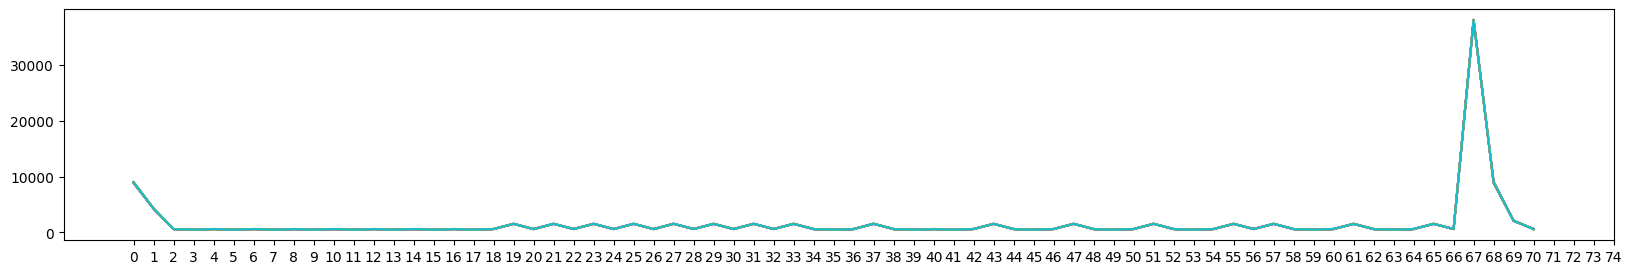

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

x_val=list(range(75))
x=[str(i) for i in range(75)]
fig, ax = plt.subplots()
for dato in dataf:
    ax.plot(dato)
plt.xticks(x_val)
plt.show()

In [ ]:
import numpy as np
A=np.array(dataf)
A.shape

(10, 71)

In [ ]:
promedios=A.mean(axis=0)
promedios.shape
maximos=A.max(axis=0)
maximos.shape
maximos=A.max(axis=0)
maximos.shape
desv_est=A.std(axis=0)
desv_est.shape
for i in range(71):
    print(promedios[i],maximos[i],minimos[i],desv_est[i])

8925.6 9019 8986 62.84934367199072
4249.9 4273 4219 7.9555012412795225
601.8 620 597 10.684568311354463
497.7 509 482 11.243220179290272
610.4 623 595 9.77957054271812
488.4 510 480 9.911609354691093
606.9 625 570 13.486660075793413
492.8 508 480 10.961751684835777
608.5 621 595 12.043670536842164
491.1 509 456 9.954396013822235
607.4 619 571 10.669582934679312
490.9 506 481 9.730878685915265
611.1 624 597 9.65867485734974
488.6 507 479 9.372299611087985
603.9 623 572 15.042938542718307
495.2 508 479 12.09793370786929
612.4 623 570 8.82269800004511
487.4 507 481 7.445804187594514
613.7 624 572 10.38315944209661
1543.2 1565 1533 10.28396810574595
603.8 621 573 13.481839637082173
1547.3 1562 1535 10.927488274987988
611.1 620 571 11.291146974510605
1543.5 1565 1509 9.851395840184273
609.2 622 595 13.422369388450011
1545.2 1563 1534 10.934349546269315
605.6 623 573 11.850738373620437
1548.8 1562 1534 10.74988372030135
614.1 623 570 8.129575634681062
1541.5 1560 1534 6.264982043070834
608.6

In [ ]:
impares=[promedios[i] for i in range(2,71) if i%2==1  ]
print(impares, end='')
pares=[promedios[i] for i in range(2,71) if i%2==0  ]
print(pares, end='')
len(pares),max(pares),min(pares),sum(pares)/len(pares)
len(impares)

[497.7, 488.4, 492.8, 491.1, 490.9, 488.6, 495.2, 487.4, 1543.2, 1547.3, 1543.5, 1545.2, 1548.8, 1541.5, 1545.3, 1543.2, 492.3, 1550.7, 493.2, 494.3, 1543.4, 488.0, 1543.6, 487.9, 1548.0, 484.2, 1543.7, 1547.4, 492.5, 1542.8, 489.5, 1544.4, 37990.8, 2090.8][601.8, 610.4, 606.9, 608.5, 607.4, 611.1, 603.9, 612.4, 613.7, 603.8, 611.1, 609.2, 605.6, 614.1, 608.6, 612.3, 606.9, 608.4, 604.1, 605.9, 612.4, 612.9, 611.6, 611.8, 608.5, 615.0, 613.0, 609.4, 604.7, 612.8, 609.7, 611.9, 612.0, 8988.7, 617.8]

34

In [ ]:
binario=[('1' if impares[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
print(binario)
cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
print(cod)
print([hex(val) for val in cod])

00000000111111110100101010110101
[0, 255, 74, 181]
['0x0', '0xff', '0x4a', '0xb5']


# Codigo binario 9

In [ ]:
def igualar_sublistas(lista_sublistas):
    # Encontrar la longitud máxima entre todas las sublistas
    max_len = min(len(sublista) for sublista in lista_sublistas)

    # Igualar todas las sublistas a la longitud máxima
    for sublista in lista_sublistas:
        del sublista[max_len:]

    return lista_sublistas

data_in = [1543490, 8929, 4247, 589, 508, 588, 510, 586, 507, 590, 507, 591, 508, 615, 484, 617, 485, 594, 505, 616, 1539, 615, 1541, 618, 1535, 594, 1562, 620, 1537, 617, 1539, 616, 1538, 616, 1539, 617, 483, 593, 1564, 590, 508, 616, 1539, 615, 485, 617, 485, 617, 1538, 619, 481, 620, 1537, 617, 484, 592, 1569, 611, 483, 615, 1540, 619, 1535, 619, 482, 616, 1538, 615, 38001, 8935, 2089, 616, 611421, 8884, 4247, 589, 510, 587, 507, 612, 485, 586, 510, 586, 508, 611, 484, 610, 487, 587, 508, 614, 1538, 614, 1538, 614, 1536, 594, 1561, 615, 1538, 617, 1537, 593, 1563, 614, 1537, 616, 484, 616, 1538, 616, 483, 595, 1561, 597, 506, 596, 507, 620, 1539, 596, 505, 621, 1537, 622, 481, 623, 1535, 621, 482, 623, 1536, 622, 1534, 600, 506, 631, 1535, 628, 37986, 8942, 2115, 618, 612379, 9004, 4269, 620, 483, 622, 483, 621, 484, 620, 482, 595, 507, 621, 481, 617, 484, 623, 483, 625, 1537, 625, 1534, 600, 1561, 625, 1534, 603, 1558, 625, 1537, 594, 1563, 621, 1536, 620, 483, 616, 1538, 592, 507, 618, 1537, 596, 504, 621, 483, 618, 1541, 591, 507, 617, 1537, 617, 483, 619, 1537, 614, 485, 590, 1563, 613, 1538, 591, 507, 604, 1553, 585, 38026, 8865, 2115, 587, 653718, 9039, 4245, 618, 484, 590, 508, 593, 505, 615, 486, 611, 485, 617, 483, 595, 506, 623, 480, 622, 1535, 595, 1562, 594, 1561, 618, 1537, 616, 1539, 619, 1539, 622, 1537, 596, 1561, 599, 506, 599, 1562, 627, 480, 626, 1536, 598, 507, 626, 480, 628, 1534, 600, 506, 602, 1562, 623, 483, 601, 1560, 599, 505, 625, 1537, 622, 1537, 622, 481, 627, 1535, 598, 38018, 9095, 2091, 622, 596970, 8972, 4269, 620, 483, 622, 481, 623, 482, 622, 482, 623, 479, 624, 481, 597, 507, 612, 489, 620, 1540, 591, 1565, 616, 1536, 619, 1539, 620, 1538, 621, 1537, 624, 1536, 599, 1561, 620, 483, 621, 1538, 597, 506, 625, 1535, 599, 505, 600, 505, 599, 1559, 620, 483, 621, 1537, 596, 505, 622, 1537, 619, 482, 596, 1561, 619, 1537, 620, 483, 620, 1536, 620, 37973, 9029, 2087, 620, 678944, 8948, 4246, 616, 483, 616, 484, 614, 483, 617, 483, 591, 506, 592, 507, 615, 483, 615, 483, 591, 1564, 590, 1561, 615, 1537, 591, 1564, 615, 1538, 593, 1561, 591, 1562, 616, 1536, 619, 482, 617, 1537, 616, 483, 594, 1564, 614, 483, 593, 506, 618, 1537, 616, 483, 592, 1564, 591, 507, 592, 1563, 592, 506, 594, 1561, 616, 1540, 614, 484, 613, 1542, 615, 37998, 8975, 2088, 596, 671240, 8978, 4269, 623, 482, 621, 483, 621, 482, 620, 483, 620, 483, 620, 484, 620, 481, 621, 481, 626, 1534, 622, 1536, 623, 1535, 624, 1538, 619, 1538, 594, 1560, 598, 1560, 620, 1536, 619, 483, 620, 1535, 620, 483, 616, 1540, 594, 507, 592, 508, 617, 1538, 618, 483, 593, 1562, 616, 486, 592, 1563, 619, 479, 594, 1561, 619, 1538, 592, 508, 593, 1562, 617, 37998, 9012, 2092, 587, 736602, 8992, 4268, 623, 481, 622, 483, 598, 504, 597, 506, 596, 506, 623, 481, 600, 503, 625, 481, 626, 1561, 601, 1533, 600, 1563, 620, 1538, 626, 1534, 601, 1561, 623, 1535, 626, 1533, 625, 481, 625, 1534, 601, 504, 626, 1535, 624, 482, 621, 482, 624, 1535, 618, 484, 624, 1535, 598, 505, 602, 1559, 598, 505, 624, 1537, 622, 1537, 622, 481, 624, 1537, 624, 37994, 9049, 2086, 603, 687874, 8879, 4272, 616, 483, 614, 487, 586, 510, 590, 509, 614, 486, 589, 511, 590, 508, 589, 509, 590, 1587, 592, 1564, 590, 1565, 565, 1588, 566, 1566, 585, 1587, 563, 1587, 563, 1588, 561, 509, 587, 1587, 586, 485, 607, 1566, 587, 485, 585, 510, 585, 1587, 587, 485, 584, 1588, 561, 508, 611, 1563, 562, 509, 584, 1588, 586, 1564, 562, 508, 587, 1587, 586, 38001, 8867, 2093, 608, 615020, 8983, 4244, 597, 507, 595, 508, 593, 510, 594, 508, 592, 509, 593, 536, 568, 509, 618, 488, 592, 1585, 595, 1562, 593, 1563, 570, 1588, 570, 1586, 570, 1587, 571, 1585, 570, 1586, 591, 487, 618, 1562, 570, 508, 594, 1587, 591, 485, 614, 485, 590, 1587, 567, 507, 612, 1565, 568, 508, 593, 1586, 568, 509, 592, 1587, 569, 1585, 569, 506, 619, 1562, 568, 38019, 8949, 2090, 591]
data_out = []
data_temp = []

for data in data_in:
    if data >= 100000:
        if data_temp:
            data_out.append(data_temp)
        data_temp = []
    data_temp.append(data)

if data_temp:
    data_out.append(data_temp)


for sublist in data_out:
    sublist.pop(0)


dataf = igualar_sublistas(data_out)

# Imprimimos el resultado
for sublist in dataf:
    print(sublist)

[8929, 4247, 589, 508, 588, 510, 586, 507, 590, 507, 591, 508, 615, 484, 617, 485, 594, 505, 616, 1539, 615, 1541, 618, 1535, 594, 1562, 620, 1537, 617, 1539, 616, 1538, 616, 1539, 617, 483, 593, 1564, 590, 508, 616, 1539, 615, 485, 617, 485, 617, 1538, 619, 481, 620, 1537, 617, 484, 592, 1569, 611, 483, 615, 1540, 619, 1535, 619, 482, 616, 1538, 615, 38001, 8935, 2089, 616]
[8884, 4247, 589, 510, 587, 507, 612, 485, 586, 510, 586, 508, 611, 484, 610, 487, 587, 508, 614, 1538, 614, 1538, 614, 1536, 594, 1561, 615, 1538, 617, 1537, 593, 1563, 614, 1537, 616, 484, 616, 1538, 616, 483, 595, 1561, 597, 506, 596, 507, 620, 1539, 596, 505, 621, 1537, 622, 481, 623, 1535, 621, 482, 623, 1536, 622, 1534, 600, 506, 631, 1535, 628, 37986, 8942, 2115, 618]
[9004, 4269, 620, 483, 622, 483, 621, 484, 620, 482, 595, 507, 621, 481, 617, 484, 623, 483, 625, 1537, 625, 1534, 600, 1561, 625, 1534, 603, 1558, 625, 1537, 594, 1563, 621, 1536, 620, 483, 616, 1538, 592, 507, 618, 1537, 596, 504, 621, 483, 6

In [ ]:
for dato in dataf:
    print(len(dato),end=', ')

71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 

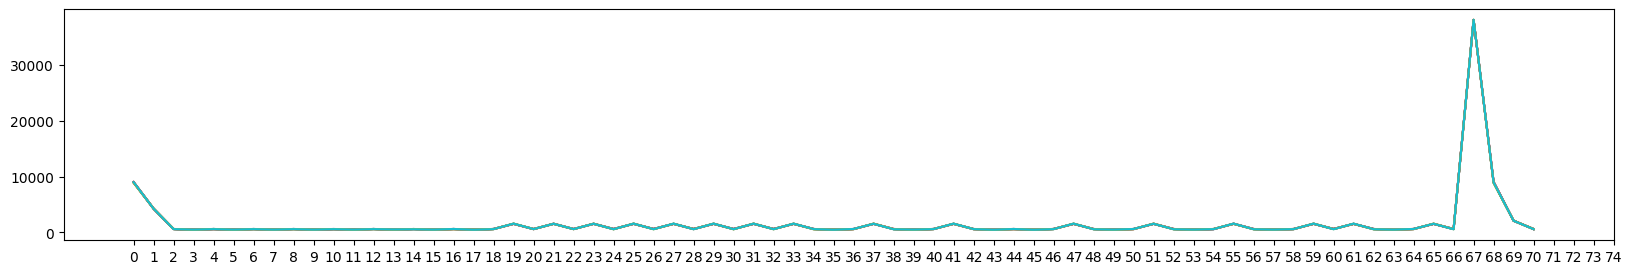

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

x_val=list(range(75))
x=[str(i) for i in range(75)]
fig, ax = plt.subplots()
for dato in dataf:
    ax.plot(dato)
plt.xticks(x_val)
plt.show()

In [ ]:
import numpy as np
A=np.array(dataf)
A.shape

(10, 71)

In [ ]:
promedios=A.mean(axis=0)
promedios.shape
maximos=A.max(axis=0)
maximos.shape
maximos=A.max(axis=0)
maximos.shape
desv_est=A.std(axis=0)
desv_est.shape
for i in range(71):
    print(promedios[i],maximos[i],minimos[i],desv_est[i])

8960.8 9039 8986 48.614401158504464
4257.6 4272 4219 11.867602959317438
611.1 623 597 13.087780560507575
490.4 510 482 11.783038657324349
607.7 622 595 14.798986451781081
493.4 510 480 12.2245654319489
604.7 623 570 14.22708684165525
495.2 510 480 12.155657119218196
605.1 622 595 14.06733805664739
495.6 510 456 12.483589227461787
601.9 623 571 12.934063553268942
497.7 509 481 11.95031380341119
610.5 624 597 13.0862523283024
493.2 536 479 17.73020022447575
602.9 620 572 15.417198189035515
495.3 509 479 11.480853626799707
610.7 625 570 14.135416513141731
490.7 509 481 11.269871339105874
612.2 626 572 14.386104406683554
1552.0 1587 1533 19.712939912656356
604.0 625 573 12.907362240210041
1549.6 1565 1535 13.395521639712282
606.3 623 571 11.480853626799707
1549.2 1565 1509 13.452137376640188
602.0 625 595 21.26969675383267
1554.9 1588 1534 19.856736892047497
607.0 626 573 20.292855885754474
1547.2 1586 1534 16.30828010551695
604.2 625 570 17.434448657758004
1554.5 1587 1534 19.043371550227

In [ ]:
impares=[promedios[i] for i in range(2,71) if i%2==1  ]
print(impares, end='')
pares=[promedios[i] for i in range(2,71) if i%2==0  ]
print(pares, end='')
len(pares),max(pares),min(pares),sum(pares)/len(pares)
len(impares)

[490.4, 493.4, 495.2, 495.6, 497.7, 493.2, 495.3, 490.7, 1552.0, 1549.6, 1549.2, 1554.9, 1547.2, 1554.5, 1556.6, 1551.3, 488.1, 1549.5, 494.7, 1550.0, 494.9, 495.1, 1549.5, 492.4, 1552.4, 495.0, 1557.2, 494.5, 1557.1, 1544.5, 494.6, 1548.7, 38001.4, 2094.6][611.1, 607.7, 604.7, 605.1, 601.9, 610.5, 602.9, 610.7, 612.2, 604.0, 606.3, 602.0, 607.0, 604.2, 599.5, 604.1, 608.7, 611.2, 601.5, 611.7, 601.5, 606.5, 611.6, 603.2, 608.6, 600.9, 604.7, 600.3, 603.7, 610.7, 601.1, 613.4, 605.6, 8971.8, 604.8]

34

In [ ]:
binario=[('1' if impares[i] > 1000 else '0')  for i in range(32) ]
binario=''.join(binario)
print(binario)
cod=[int(binario[i*8 : (i+1)*8],2)  for i in range(4)]
print(cod)
print([hex(val) for val in cod])

00000000111111110101001010101101
[0, 255, 82, 173]
['0x0', '0xff', '0x52', '0xad']
